## Installation des packages FactoMineR et factoextra

In [3]:
install.packages(c("FactoMineR", "factoextra"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Importation des données Decathlon

In [4]:
library("FactoMineR")
library("factoextra")

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [6]:
data(decathlon2)
head(decathlon2)

,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle,Discus,Pole.vault,Javeline,X1500m,Rank,Points,Competition
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar
ZSIVOCZKY,11.13,7.30,13.48,2.01,48.62,14.17,45.67,4.42,55.37,268.0,7,8004,Decastar
McMULLEN,10.83,7.31,13.76,2.13,49.91,14.38,44.41,4.42,56.37,285.1,8,7995,Decastar


In [7]:
decathlon2.active <- decathlon2[1:23, 1:10]
head(decathlon2.active[, 1:6], 4)

,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69
CLAY,10.76,7.40,14.26,1.86,49.37,14.05
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31


# Standardisation des données

Format simplifié:

In [10]:
PCA(decathlon2.active, scale.unit = TRUE, ncp = 5, graph = TRUE)

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 23 individuals, described by 10 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error o

Calculer l’ACP sur les individus/variables actifs:

In [12]:
res.pca <- PCA(decathlon2.active, graph = FALSE)
print(res.pca)

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 23 individuals, described by 10 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error o

# Visualisation et interprétation


In [13]:
eig.val <- get_eigenvalue(res.pca)
eig.val

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,4.1242133,41.242133,41.24213
Dim.2,1.8385309,18.385309,59.62744
Dim.3,1.2391403,12.391403,72.01885
Dim.4,0.8194402,8.194402,80.21325
Dim.5,0.7015528,7.015528,87.22878
Dim.6,0.4228828,4.228828,91.45760
Dim.7,0.3025817,3.025817,94.48342
Dim.8,0.2744700,2.744700,97.22812
Dim.9,0.1552169,1.552169,98.78029
Dim.10,0.1219710,1.219710,100.00000


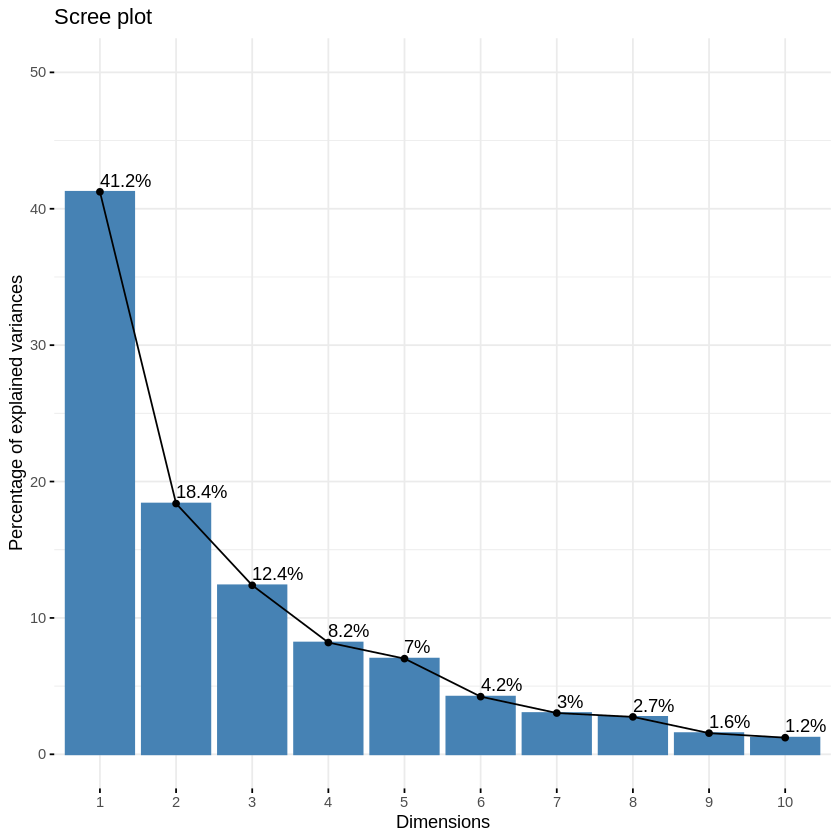

In [14]:
fviz_eig(res.pca, addlabels = TRUE, ylim = c(0, 50))

# Graphique des variables

In [15]:
var <- get_pca_var(res.pca)
var

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

Cercle de corrélation


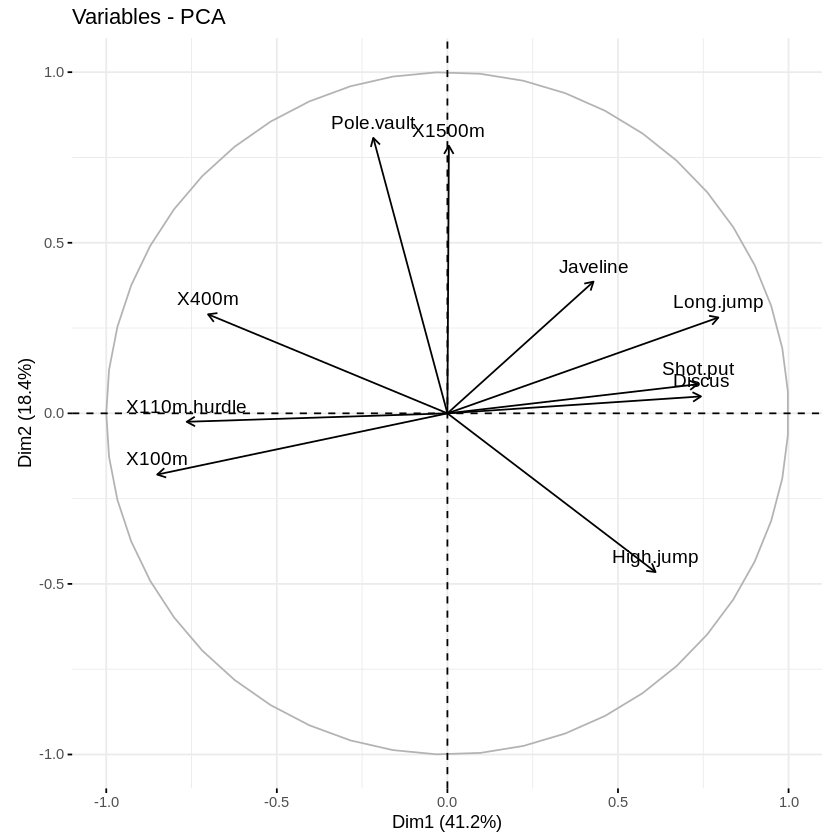

In [18]:
fviz_pca_var(res.pca, col.var = "black")

Qualité de représentation

corrplot 0.92 loaded



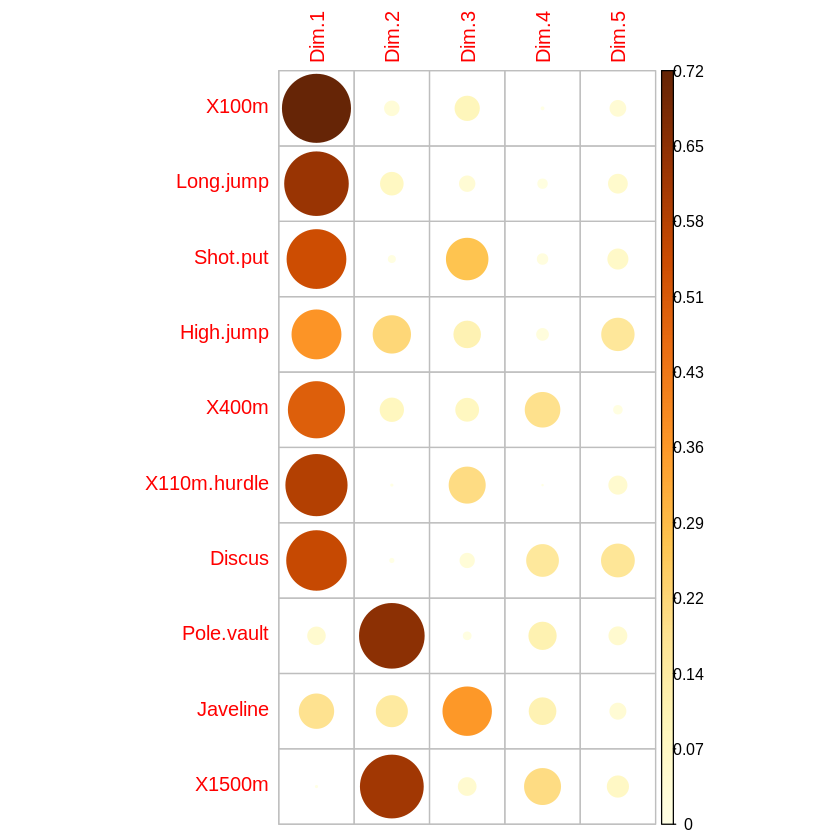

In [20]:
library("corrplot")
corrplot(var$cos2, is.corr=FALSE)

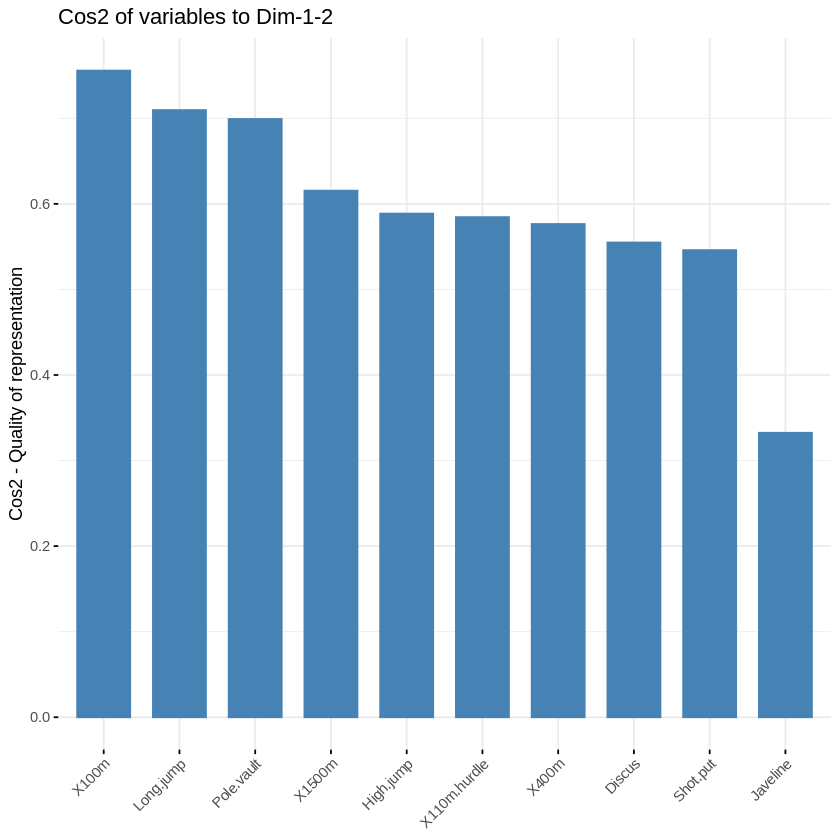

In [21]:
fviz_cos2(res.pca, choice = "var", axes = 1:2)


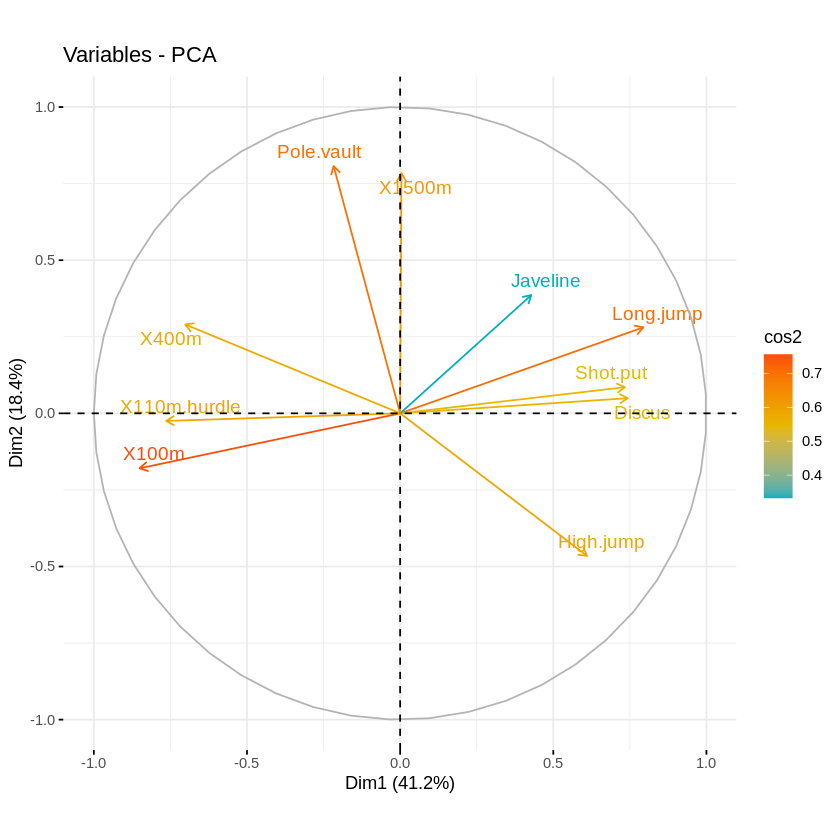

In [22]:
# Colorer en fonction du cos2: qualité de représentation
fviz_pca_var(res.pca, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Évite le chevauchement de texte
             )

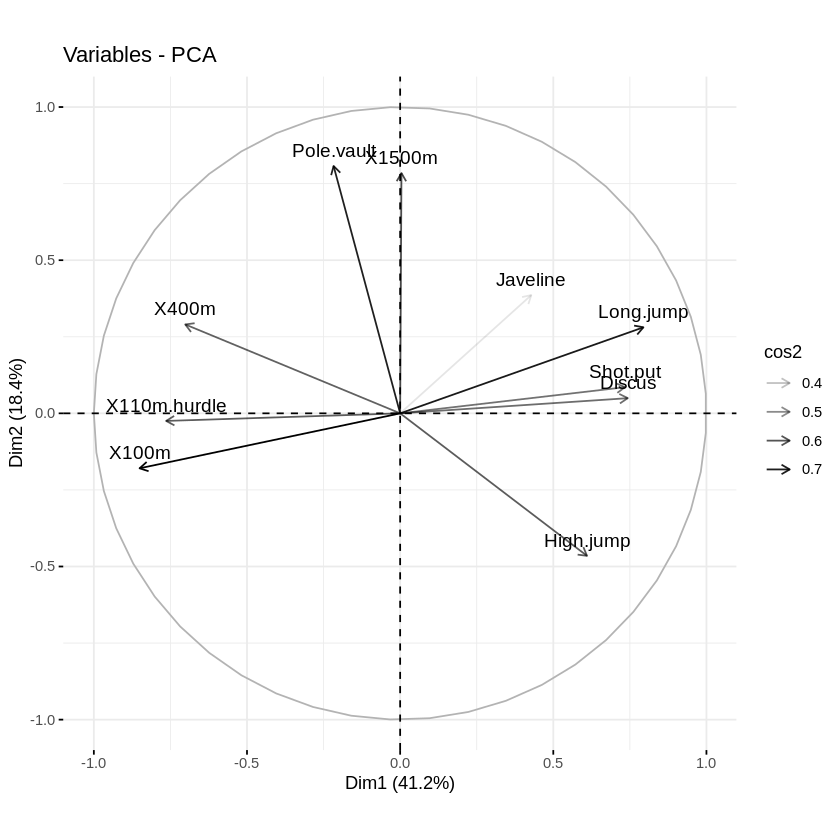

In [23]:
fviz_pca_var(res.pca, alpha.var = "cos2")

# Contributions des variables aux axes principaux


In [24]:
head(var$contrib, 4)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
X100m,17.544293,1.7505098,7.338659,0.1375524,5.389252
Long.jump,15.293168,4.2904162,2.930094,1.6248594,7.748815
Shot.put,13.060137,0.3967224,21.620432,2.0140727,8.824401
High.jump,9.024811,11.7715838,8.792888,2.5498795,23.115504


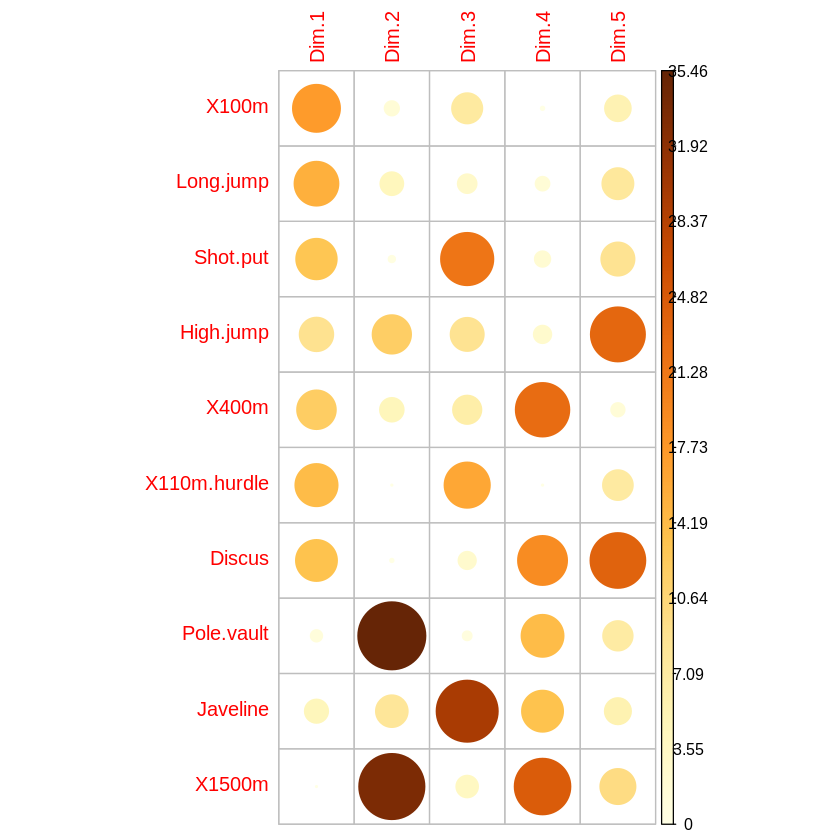

In [25]:
corrplot(var$contrib, is.corr=FALSE)    


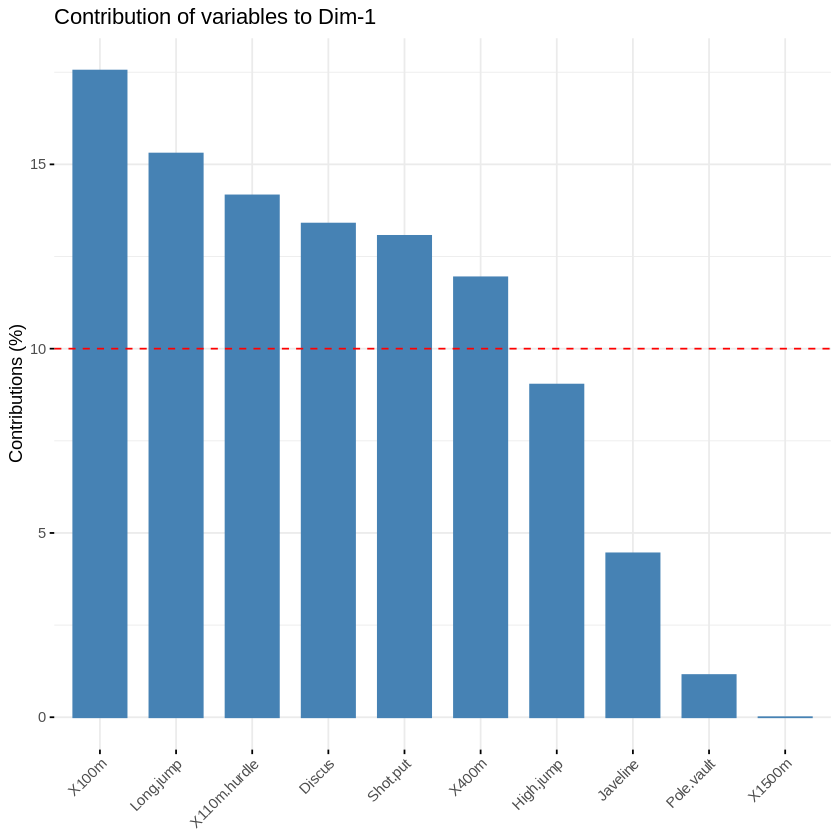

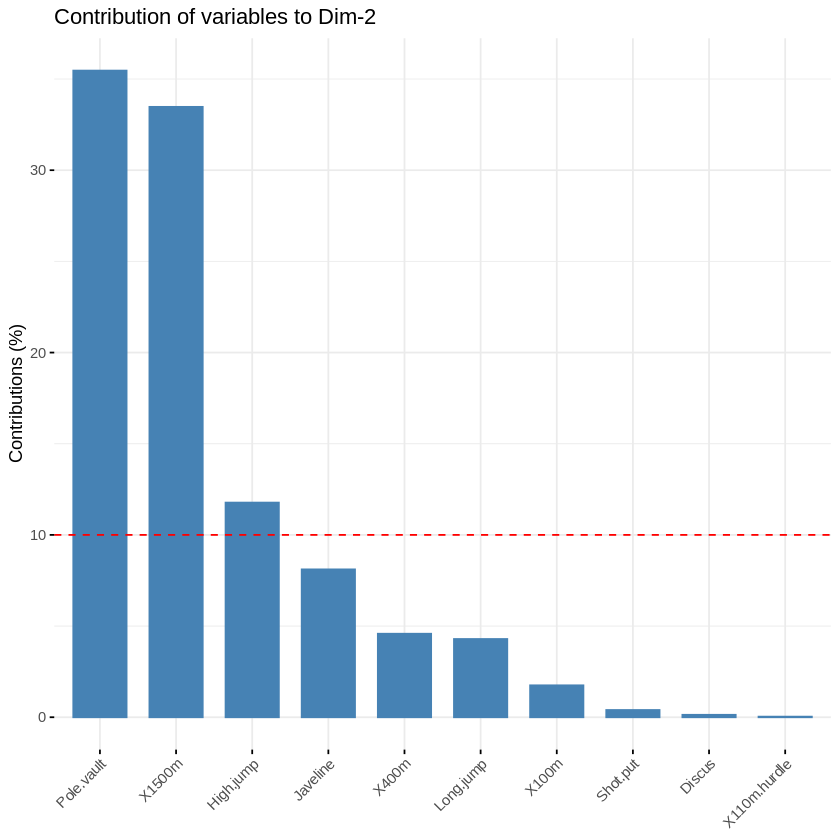

In [26]:
# Contributions des variables à PC1
fviz_contrib(res.pca, choice = "var", axes = 1, top = 10)
# Contributions des variables à PC2
fviz_contrib(res.pca, choice = "var", axes = 2, top = 10)

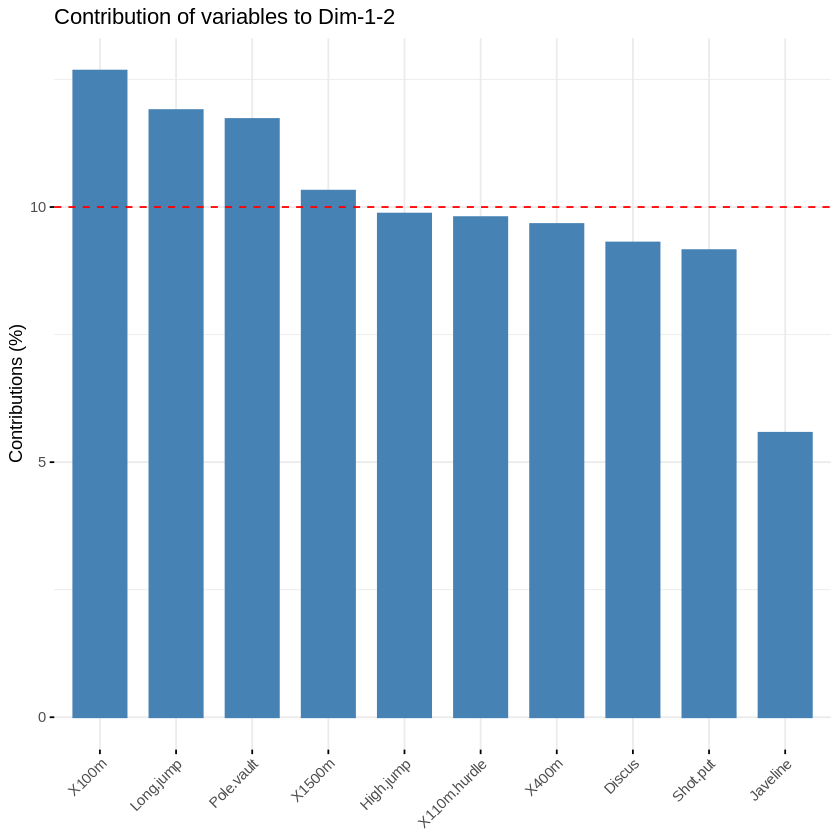

In [27]:
fviz_contrib(res.pca, choice = "var", axes = 1:2, top = 10)


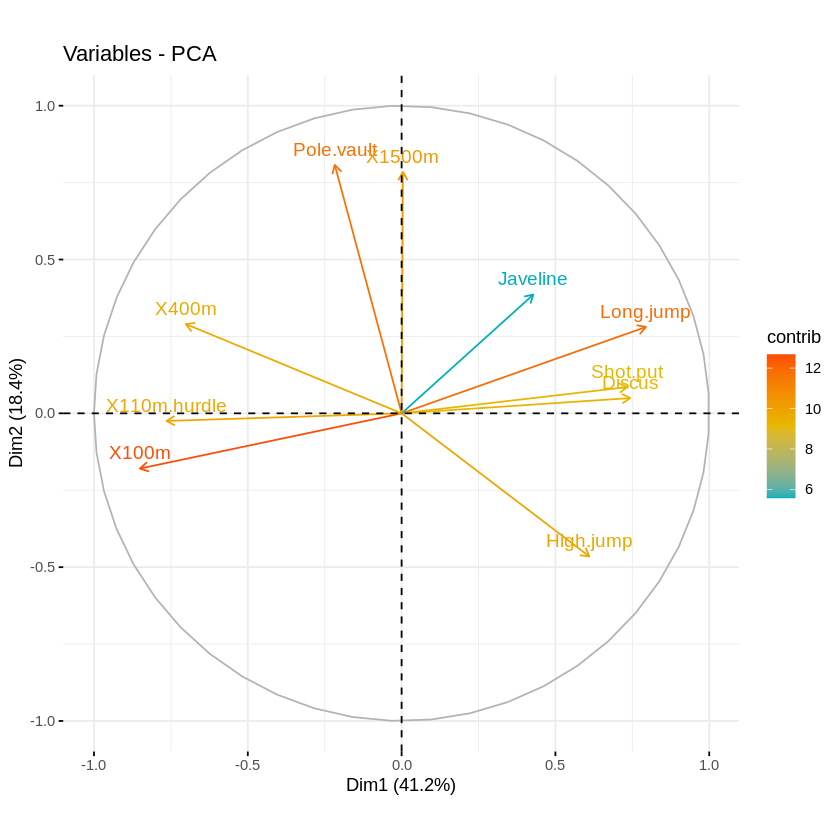

In [28]:
fviz_pca_var(res.pca, col.var = "contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07")
             )

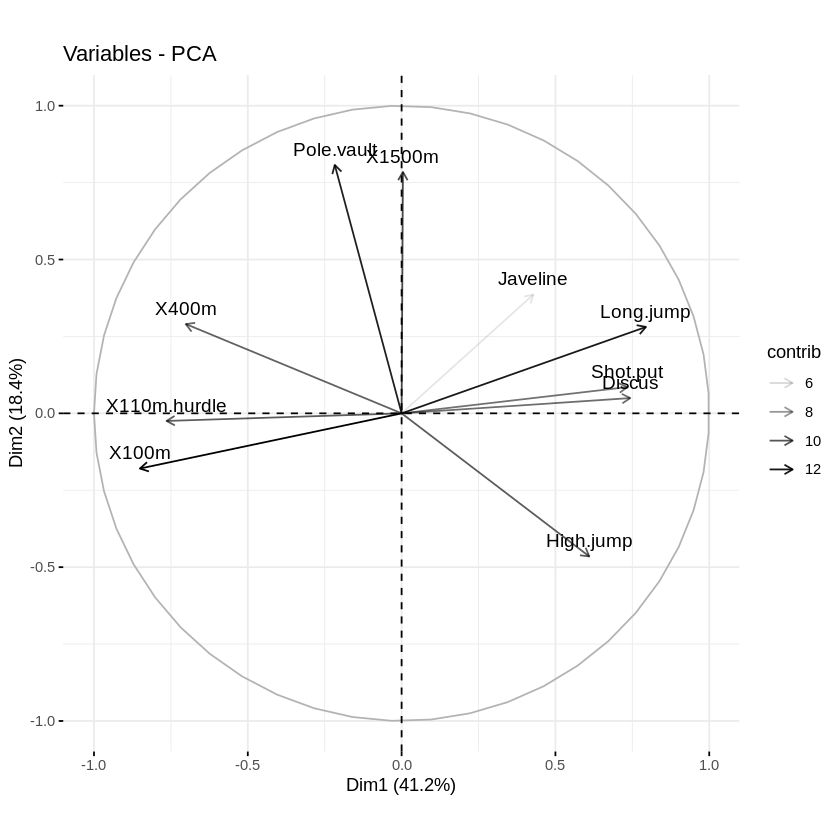

In [29]:
fviz_pca_var(res.pca, alpha.var = "contrib")


Colorer en fonction d’une variable continue quelconque


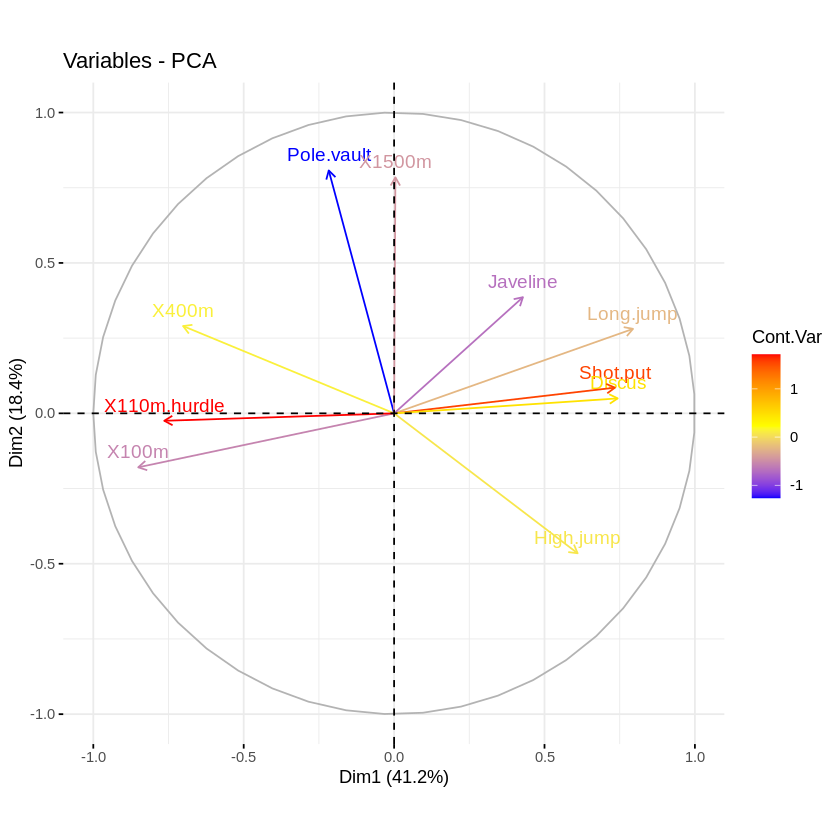

In [30]:
# Créer une variable aléatoire continue de longueur 10
set.seed (123)
my.cont.var <- rnorm (10)
# Colorer les variables en fonction de la variable continue
fviz_pca_var(res.pca, col.var = my.cont.var,
             gradient.cols = c("blue", "yellow", "red"),
             legend.title = "Cont.Var")

Description des dimensions


In [31]:
res.desc <- dimdesc(res.pca, axes = c(1,2), proba = 0.05)
# Description de la dimension 1
res.desc$Dim.1

,correlation,p.value
Long.jump,0.7941806,6.059893e-06
Discus,0.7432090,4.842563e-05
Shot.put,0.7339127,6.723102e-05
High.jump,0.6100840,1.993677e-03
Javeline,0.4282266,4.149192e-02
X400m,-0.7016034,1.910387e-04
X110m.hurdle,-0.7641252,2.195812e-05
X100m,-0.8506257,2.727129e-07


In [32]:
res.desc$Dim.2


,correlation,p.value
Pole.vault,0.8074511,3.205016e-06
X1500m,0.7844802,9.384747e-06
High.jump,-0.4652142,2.529390e-02


# Graphique des individus
**Résultats**

In [33]:
ind <- get_pca_ind(res.pca)
ind

Principal Component Analysis Results for individuals
  Name       Description                       
1 "$coord"   "Coordinates for the individuals" 
2 "$cos2"    "Cos2 for the individuals"        
3 "$contrib" "contributions of the individuals"

**Graphique: qualité et contribution**

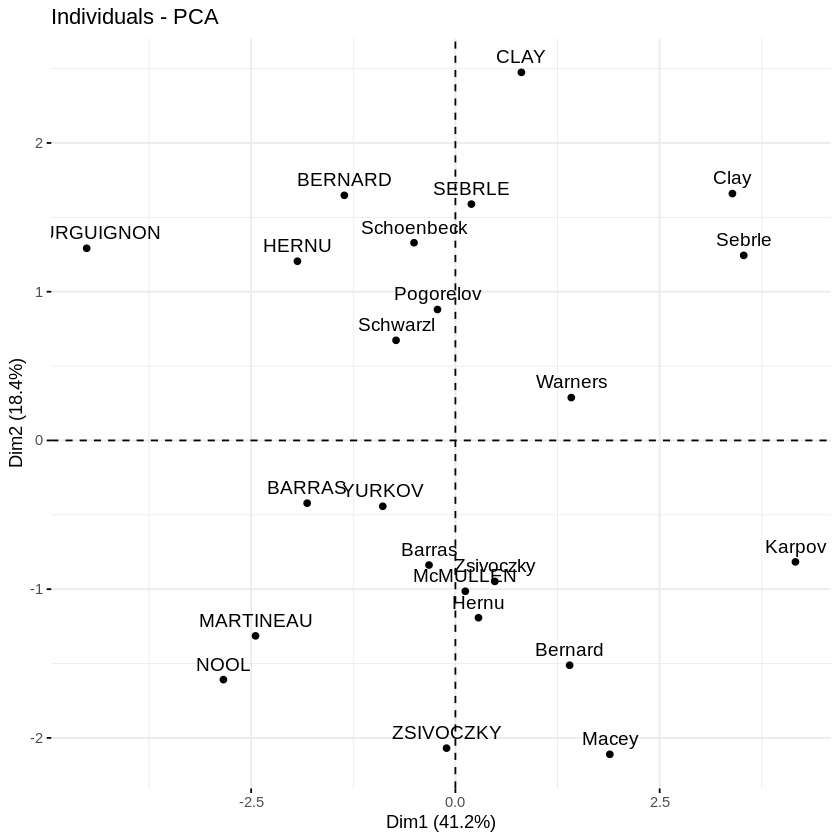

In [34]:
fviz_pca_ind (res.pca)


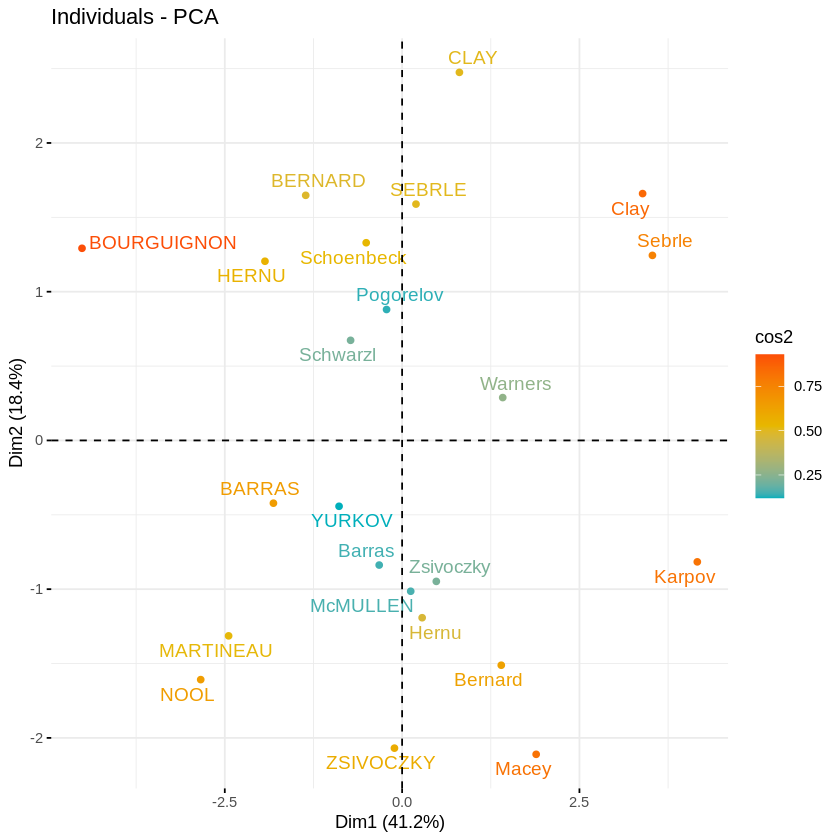

In [35]:
fviz_pca_ind (res.pca, col.ind = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Évite le chevauchement de texte
             )

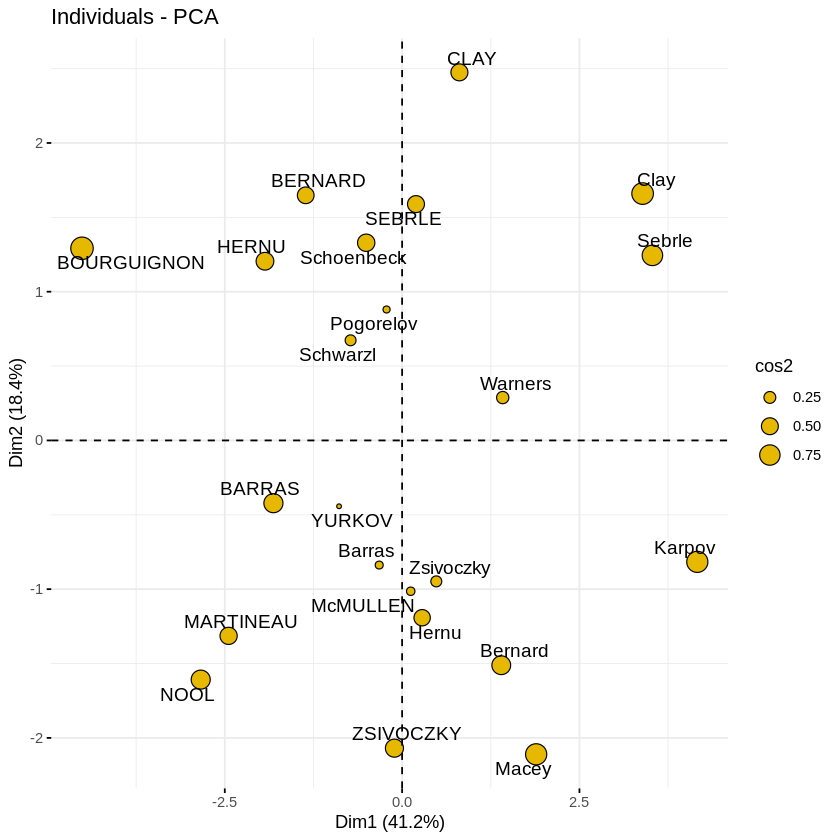

In [36]:
fviz_pca_ind (res.pca, pointsize = "cos2",
             pointshape = 21, fill = "#E7B800",
             repel = TRUE # Évite le chevauchement de texte
             )

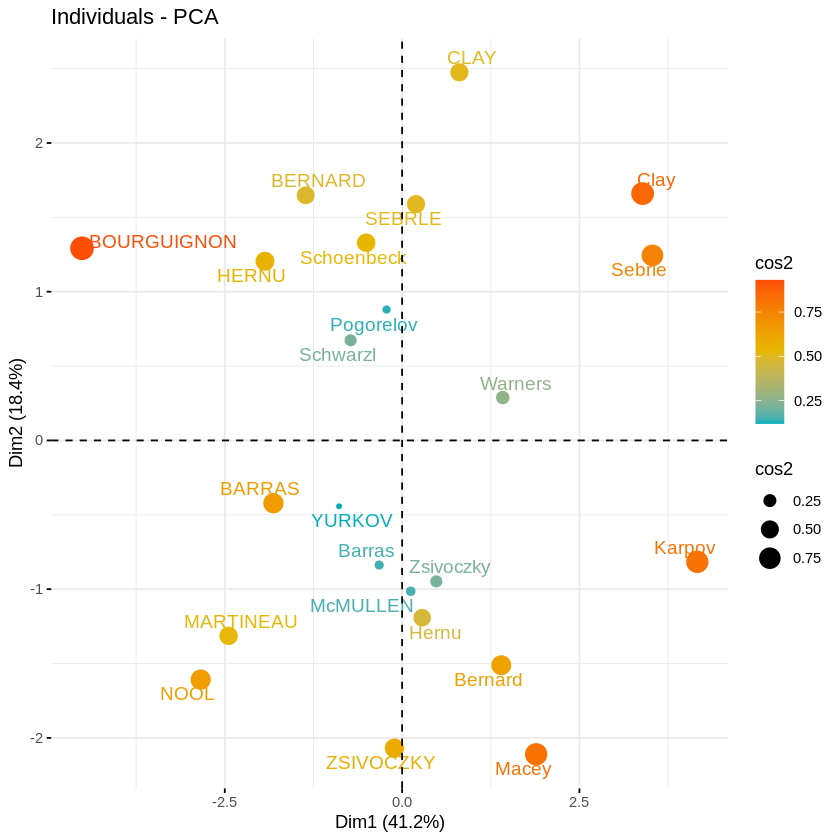

In [37]:
fviz_pca_ind(res.pca, col.ind = "cos2", pointsize = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE 
             )

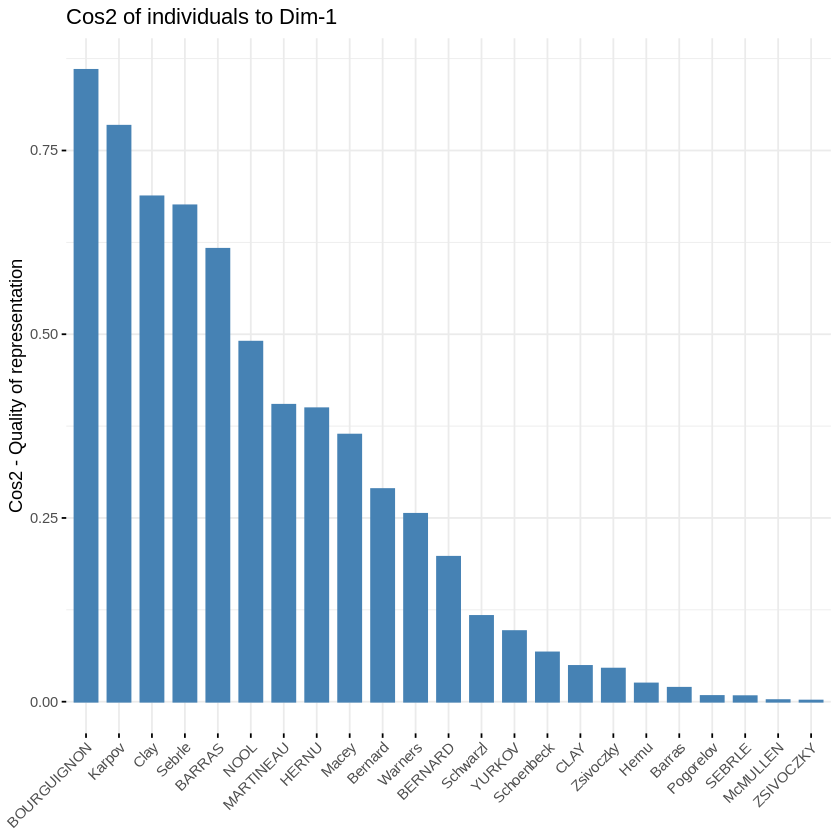

In [38]:
fviz_cos2(res.pca, choice = "ind")


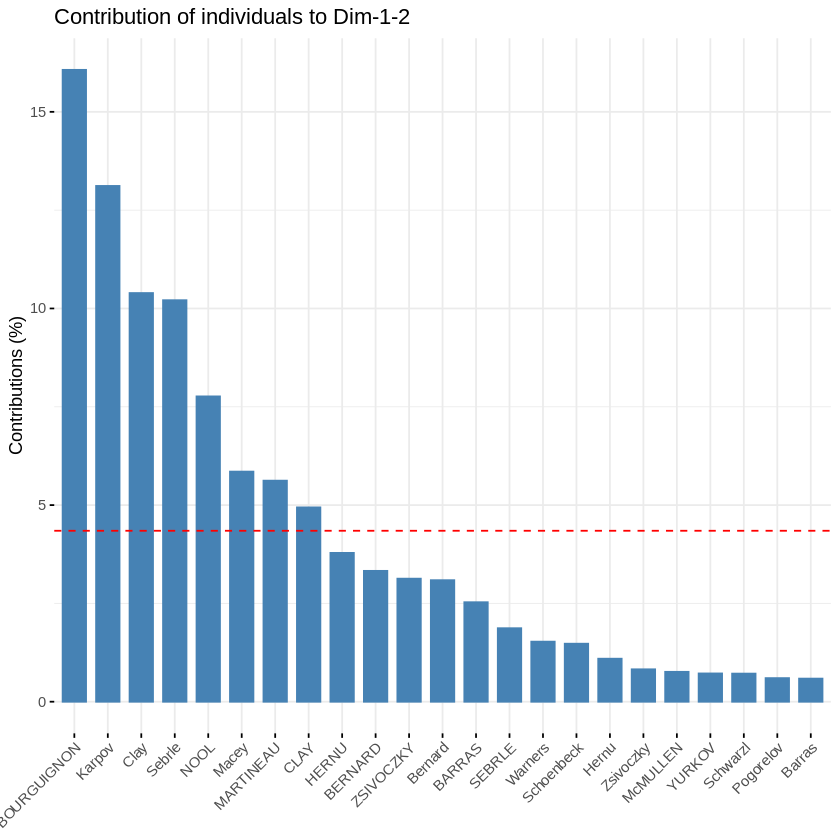

In [39]:
# Contribution totale sur PC1 et PC2
fviz_contrib(res.pca, choice = "ind", axes = 1:2)

**Colorer en fonction d’une variable continue quelconque**

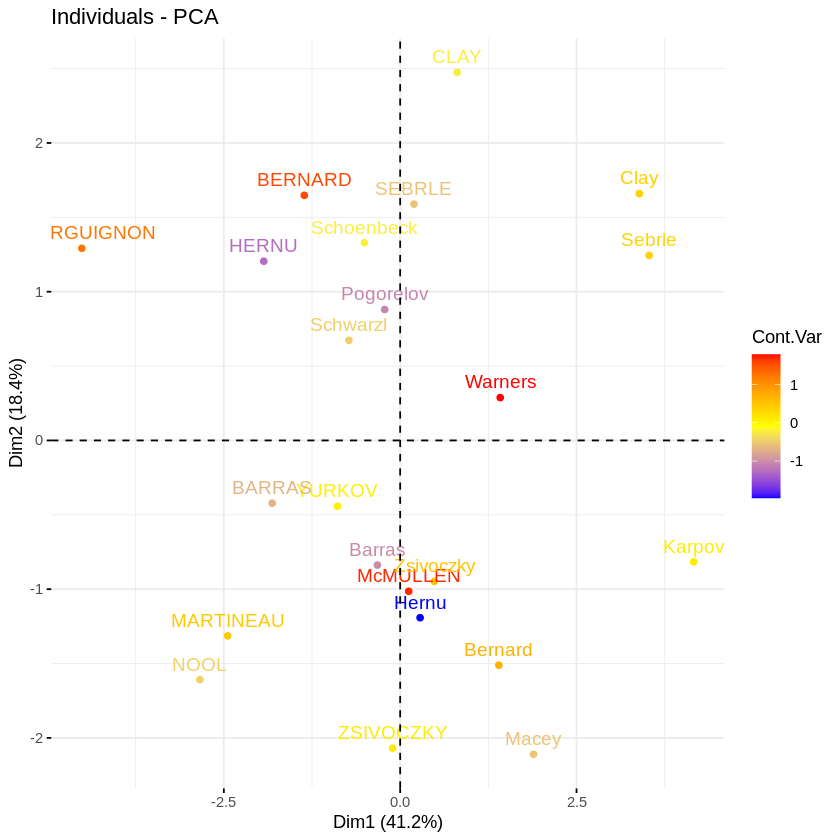

In [40]:
# Créez une variable continue aléatoire de longueur 23,
# Même longeur que le nombre d'individus actifs dans l'ACP
set.seed (123)
my.cont.var <- rnorm(23)
# Colorer les individus par la variable continue
fviz_pca_ind(res.pca, col.ind = my.cont.var,
             gradient.cols = c("blue", "yellow", "red"),
             legend.title = "Cont.Var")


**Colorer par groupes**

In [41]:
head(iris, 3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [42]:
# La variable Species (index = 5) est supprimée
# avant l'ACP
iris.pca <- PCA(iris [, - 5], graph = FALSE)

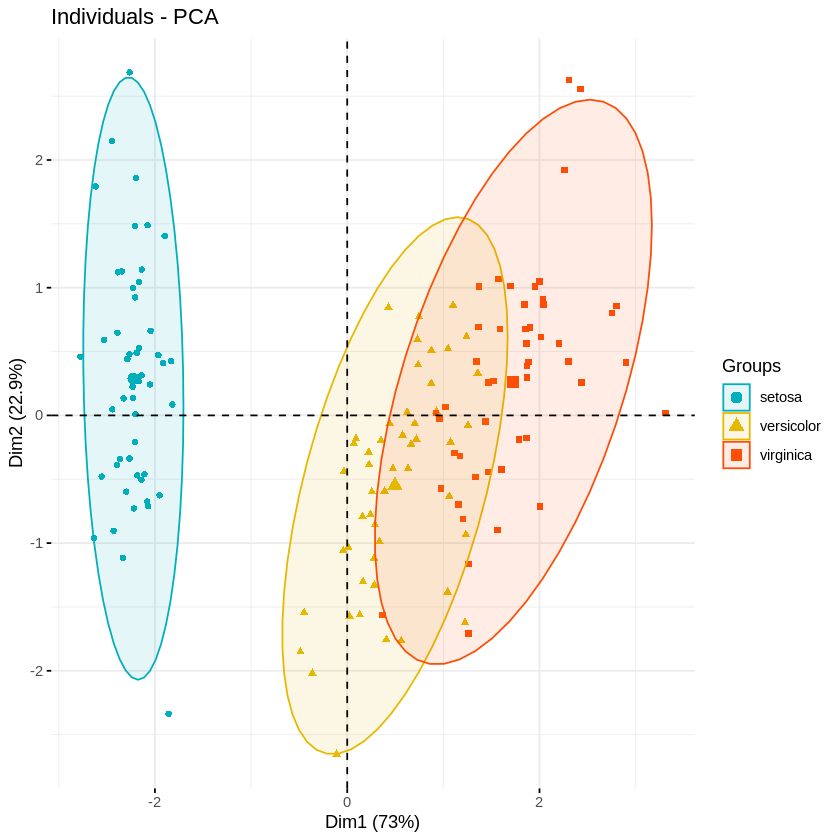

In [43]:
fviz_pca_ind(iris.pca,
             geom.ind = "point", # Montre les points seulement (mais pas le "text")
             col.ind = iris$Species, # colorer by groups
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             addEllipses = TRUE, # Ellipses de concentration
             legend.title = "Groups"
             )

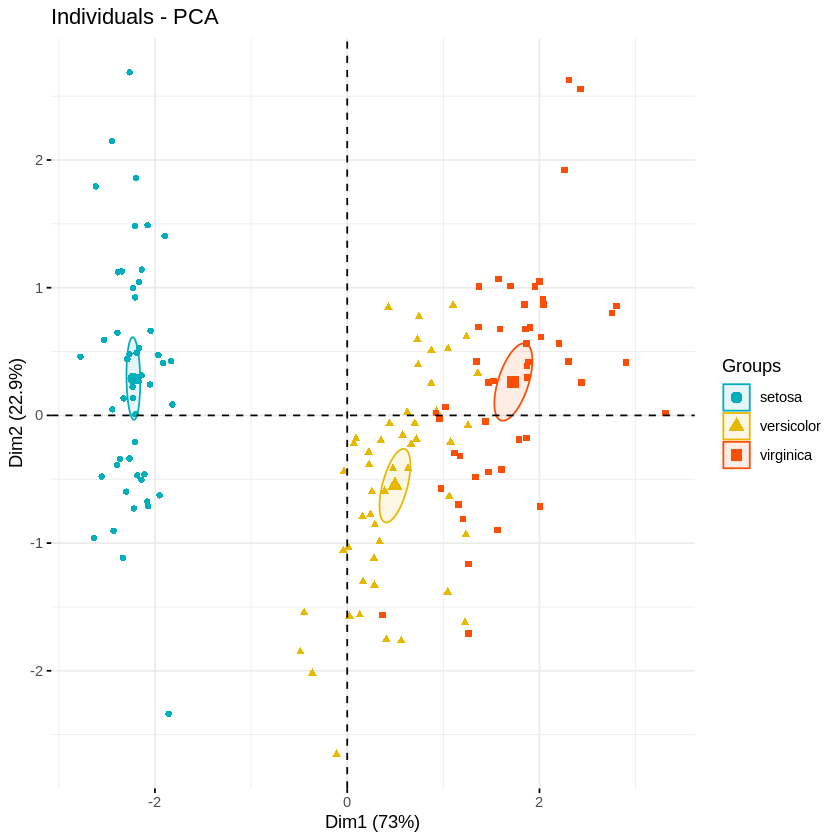

In [44]:
# Ajoutez des ellipses de confiance
fviz_pca_ind(iris.pca, geom.ind = "point", col.ind = iris$Species, 
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             addEllipses = TRUE, ellipse.type = "confidence",
             legend.title = "Groups"
             )

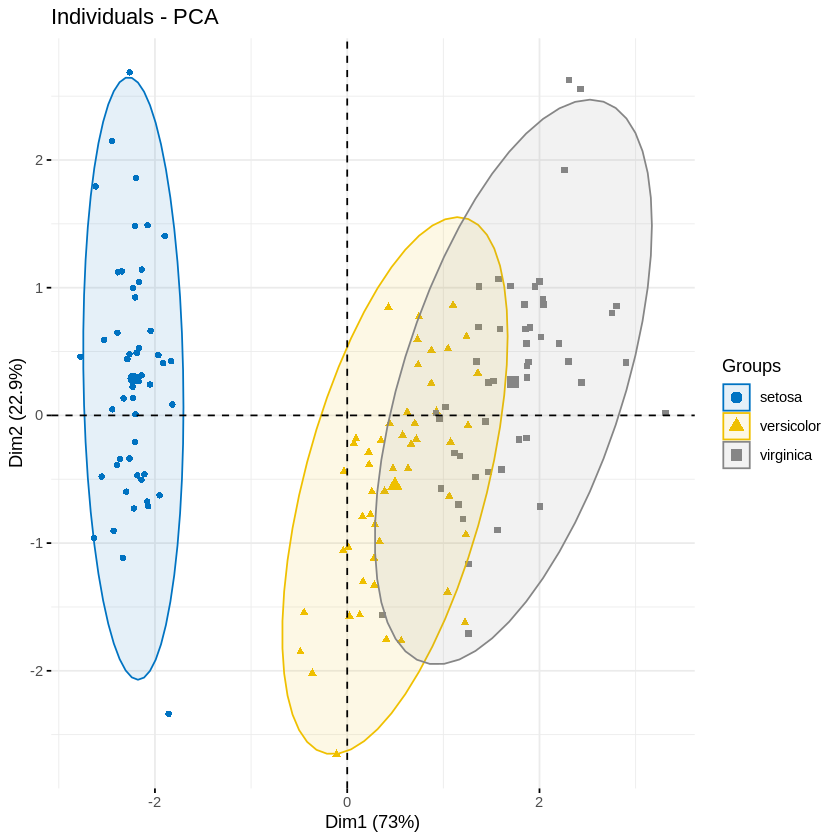

In [45]:
fviz_pca_ind(iris.pca,
             label = "none", # Caché le texte des individus
             habillage = iris$Species, # colorer par groupes
             addEllipses = TRUE, # Ellipses de concentration
             palette = "jco"
             )

**Dimension**

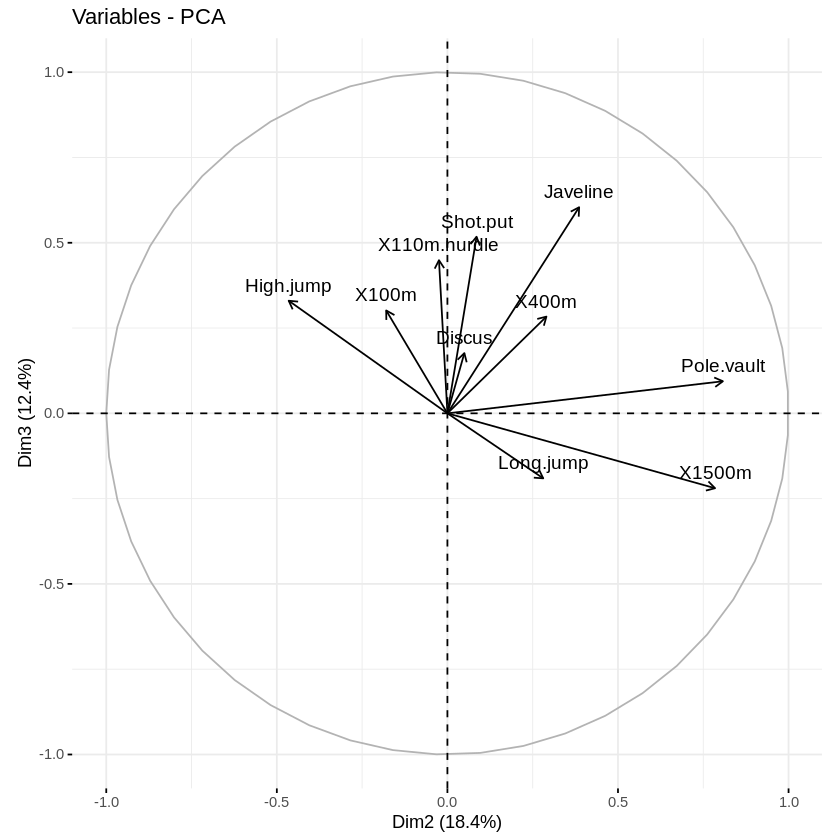

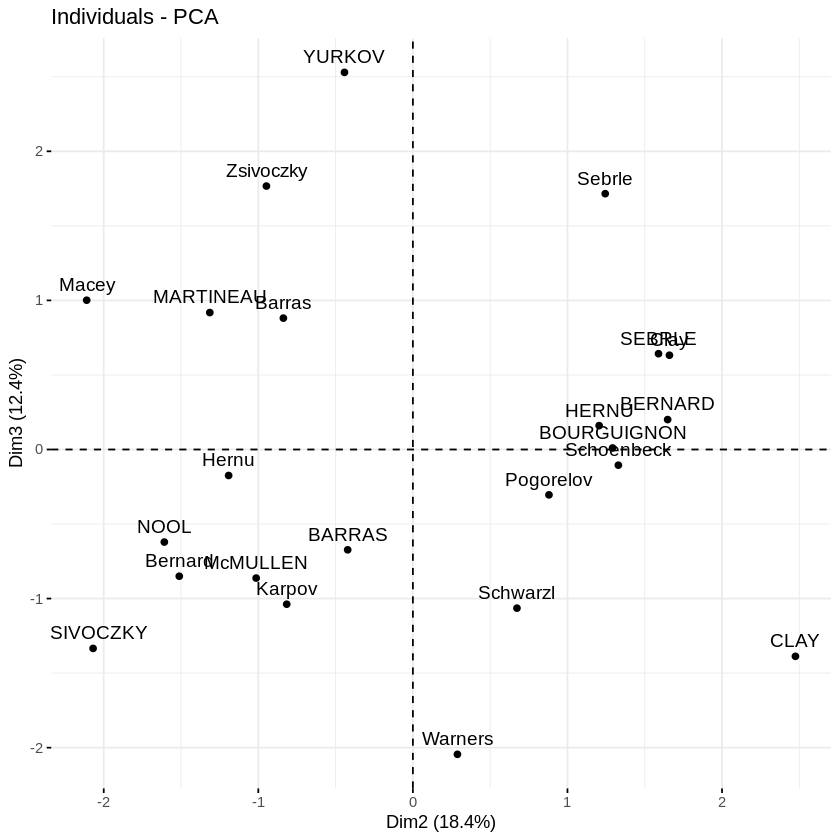

In [46]:
# Variables sur les dimensions 2 et 3
fviz_pca_var(res.pca, axes = c(2, 3))
# Individus sur les dimensions 2 et 3
fviz_pca_ind(res.pca, axes = c(2, 3))

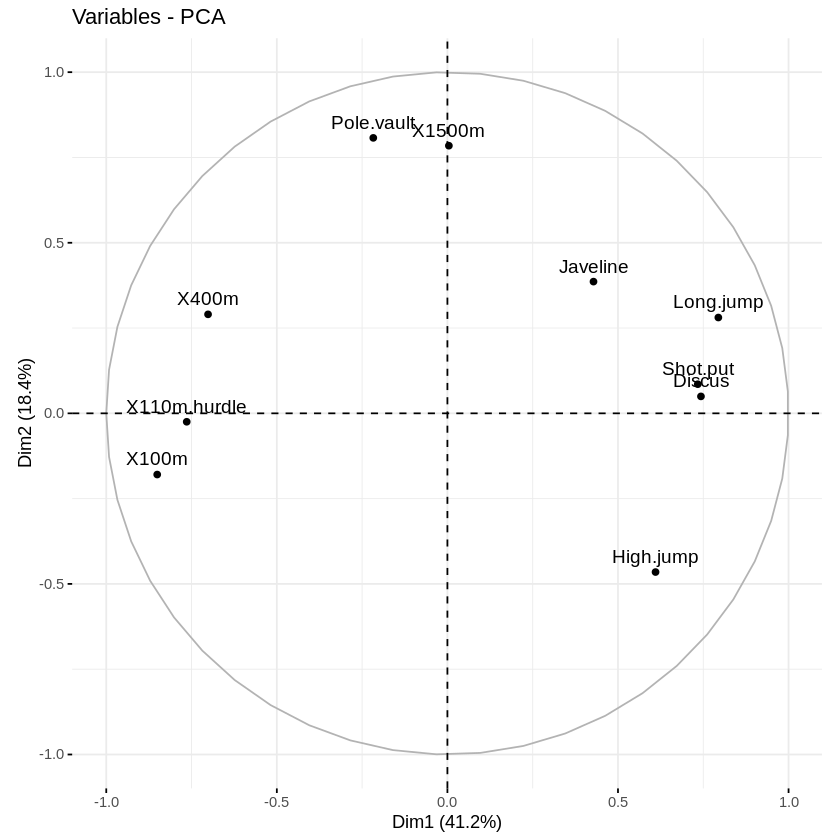

In [47]:
# Afficher les points et l'annotation des variables
fviz_pca_var(res.pca, geom.var = c("point", "text"))

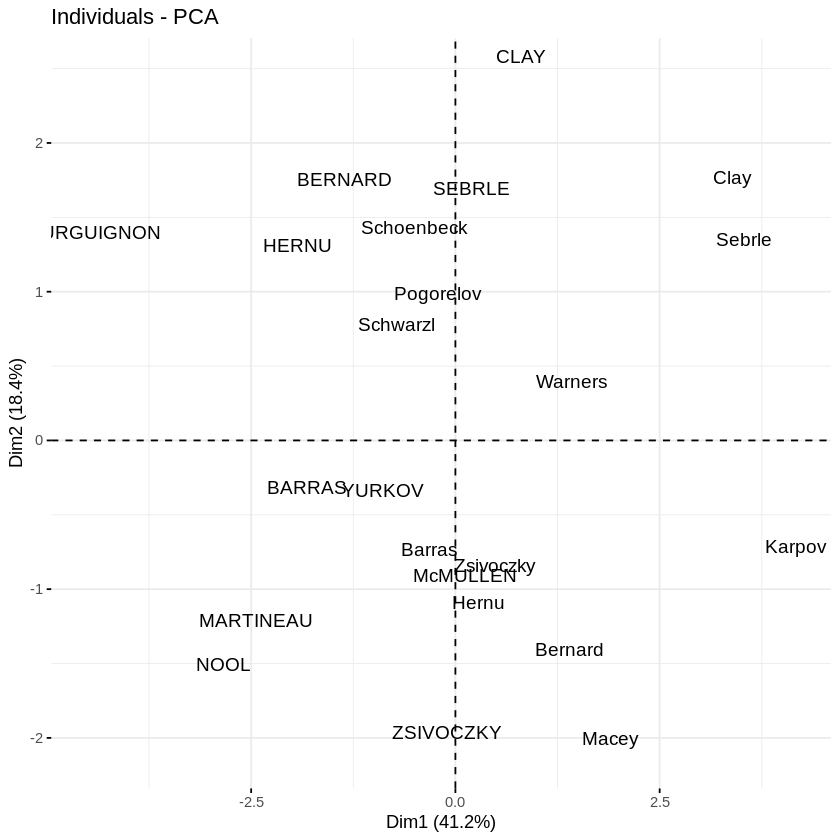

In [48]:
# Afficher uniquement l'annotation des individus
fviz_pca_ind(res.pca, geom.ind = "text")

**Taille et forme des éléments graphiques**

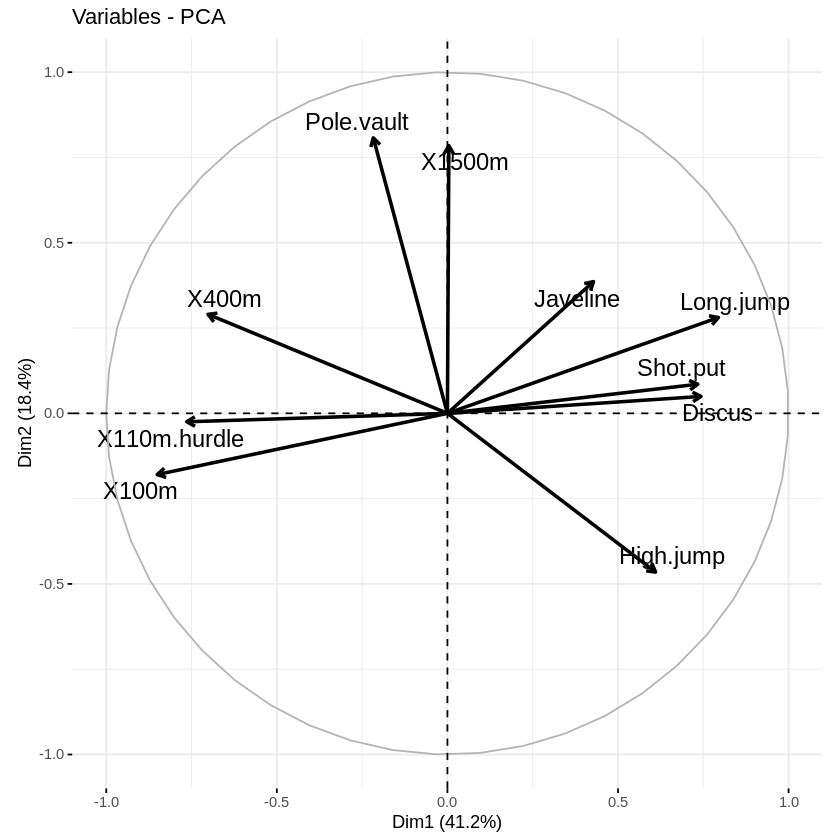

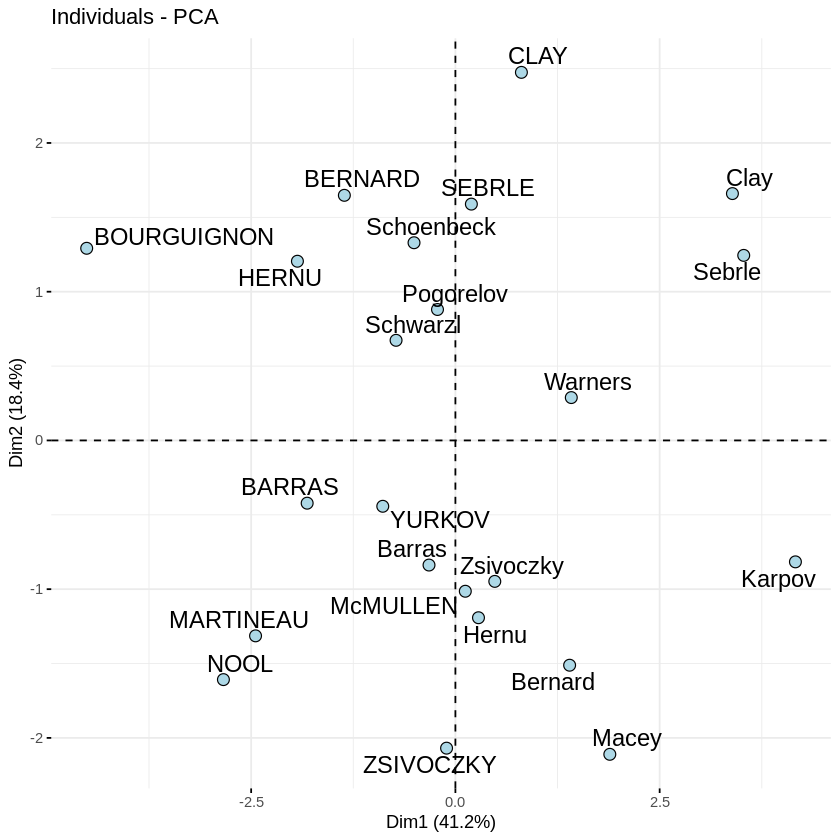

In [49]:
# Changez la taille des flèches et du texte
fviz_pca_var(res.pca, arrowsize = 1, labelsize = 5,
             repel = TRUE)
# Modification de la taille, de la forme 
# et de la couleur de remplissage des points
# Modifier la taille du texte
fviz_pca_ind (res.pca,
             pointsize = 3, pointshape = 21, fill = "lightblue",
             labelsize = 5, repel = TRUE)

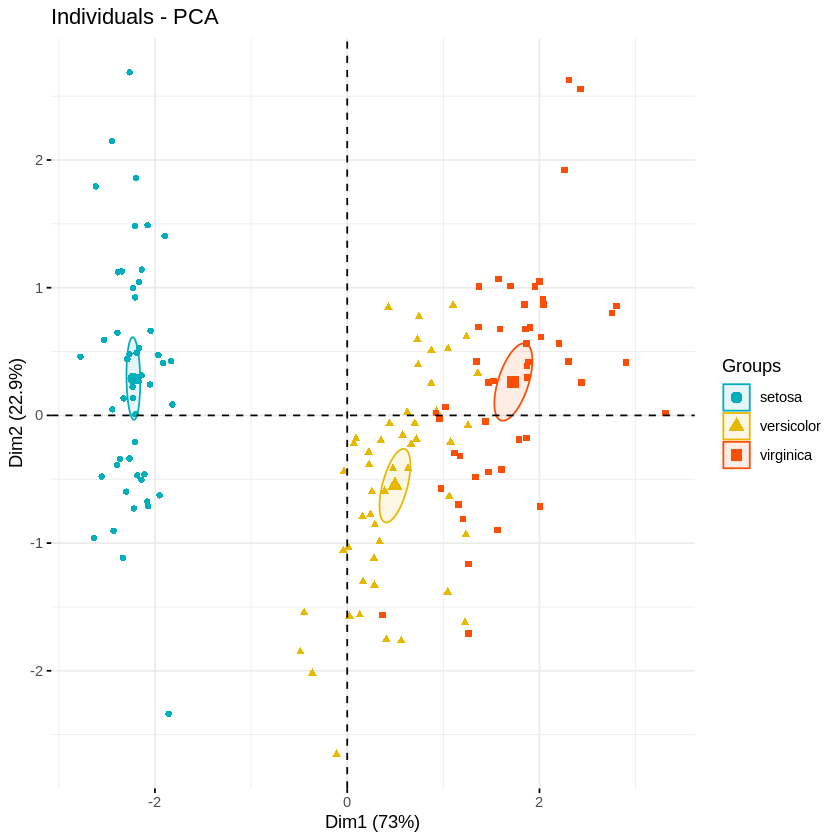

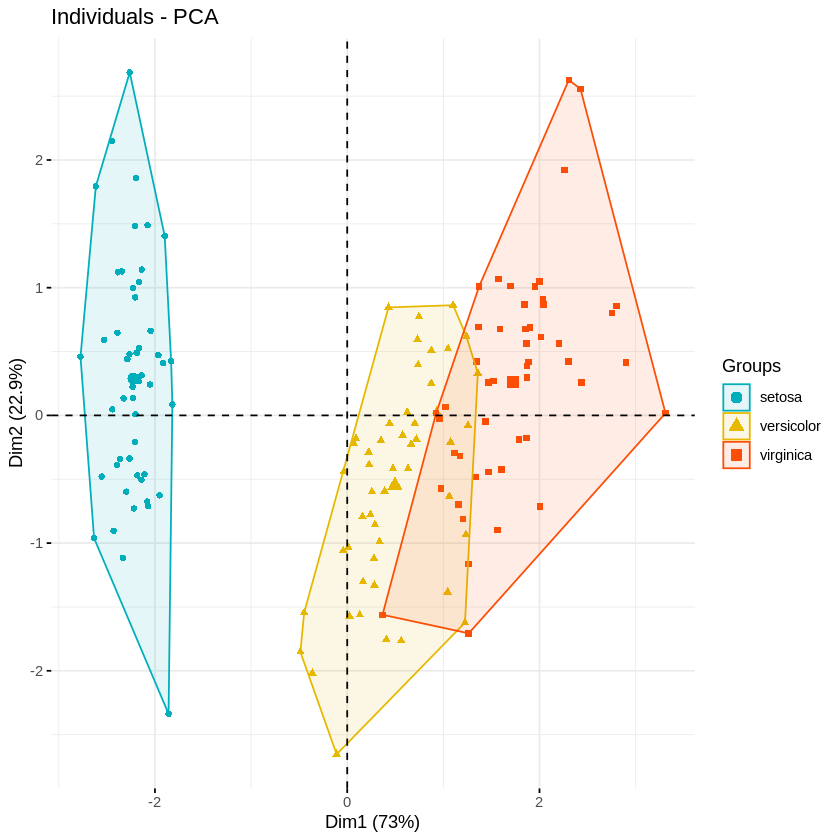

In [50]:
# Add confidence ellipses
fviz_pca_ind(iris.pca, geom.ind = "point", 
             col.ind = iris$Species, # color by groups
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             addEllipses = TRUE, ellipse.type = "confidence",
             legend.title = "Groups"
             )
# Convex hull
fviz_pca_ind(iris.pca, geom.ind = "point",
             col.ind = iris$Species, # color by groups
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             addEllipses = TRUE, ellipse.type = "convex",
             legend.title = "Groups"
             )

**Centre de gravité: Le point moyen des groupes**

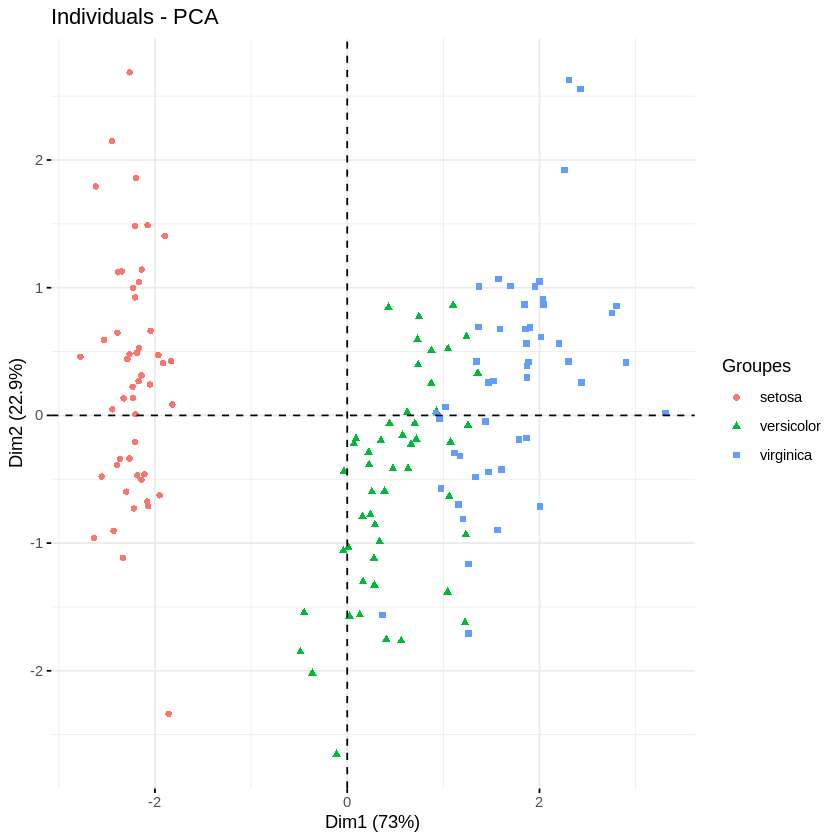

In [51]:
fviz_pca_ind (iris.pca,
             geom.ind = "point", # afficher les points seulement (pas de "texte")
             col.ind = iris$Species, # Couleur par groupes
             legend.title = "Groupes",
             mean.point = FALSE)

**Axes**

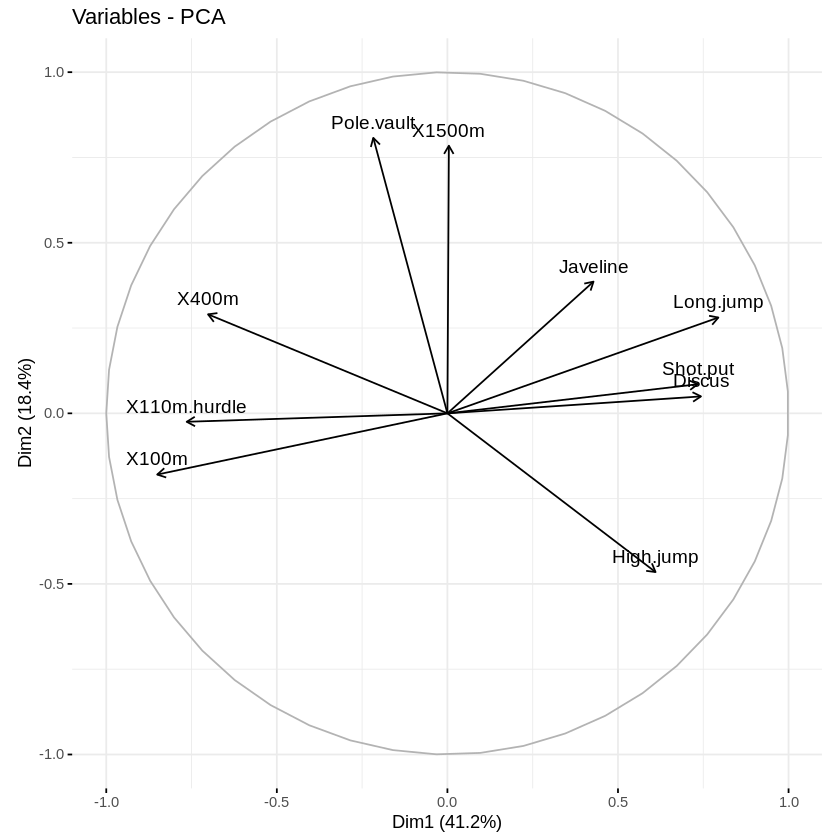

In [52]:
fviz_pca_var (res.pca, axes.linetype = "blank")

**Paramètres graphiques**

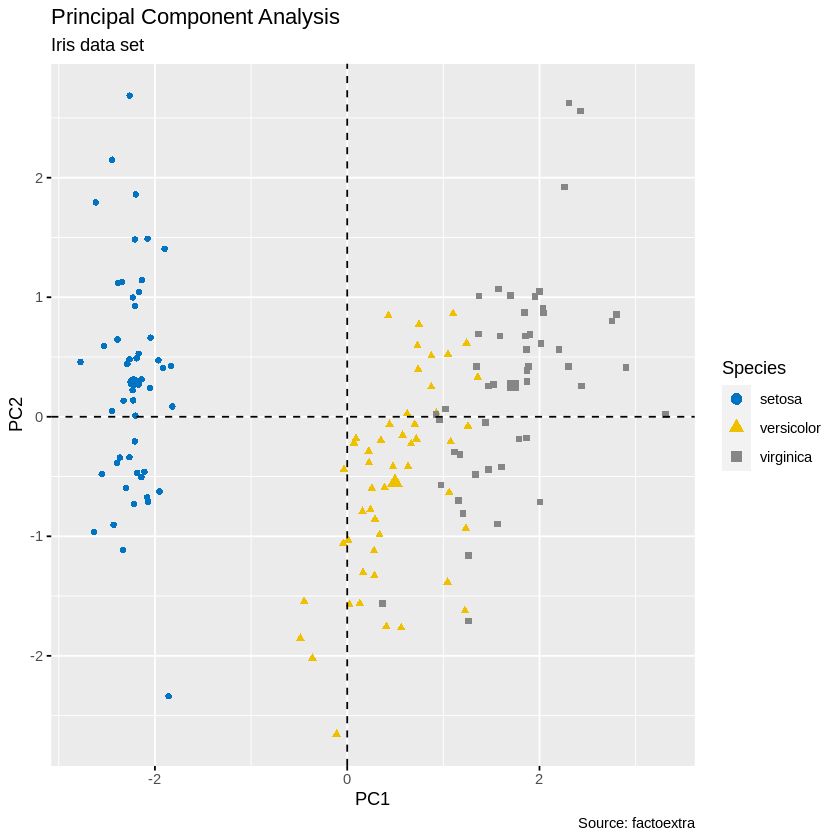

In [53]:
ind.p <- fviz_pca_ind(iris.pca, geom = "point", col.ind = iris$Species)
ggpubr::ggpar(ind.p,
              title = "Principal Component Analysis",
              subtitle = "Iris data set",
              caption = "Source: factoextra",
              xlab = "PC1", ylab = "PC2",
              legend.title = "Species", legend.position = "top",
              ggtheme = theme_gray(), palette = "jco"
              )

**Biplot**

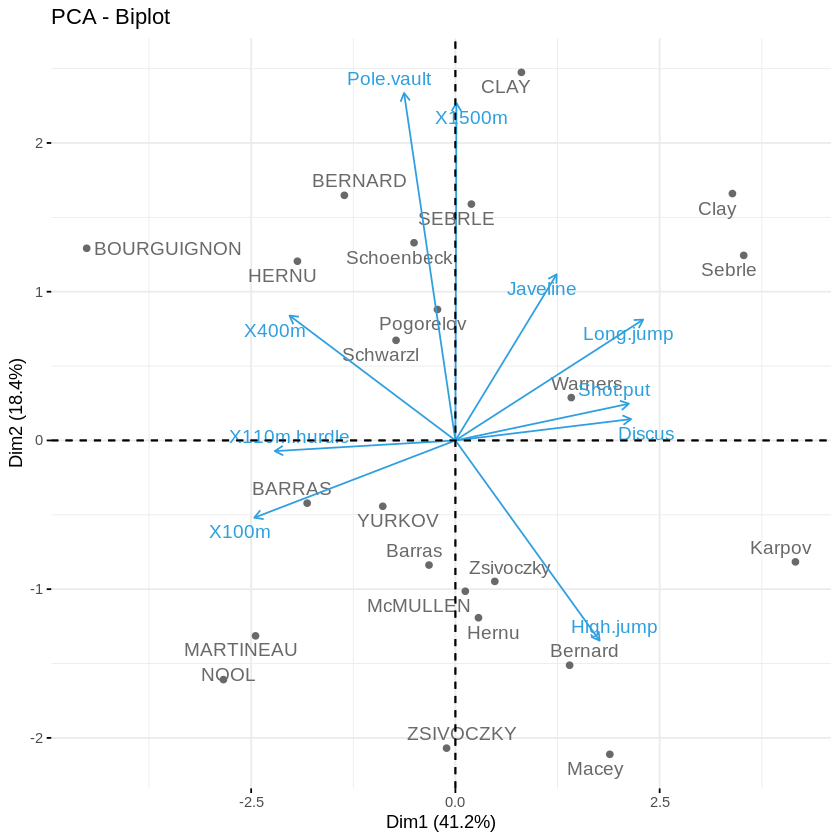

In [54]:
fviz_pca_biplot(res.pca, repel = TRUE,
                col.var = "#2E9FDF", # Couleur des variables
                col.ind = "#696969"  # Couleur des individues
                )

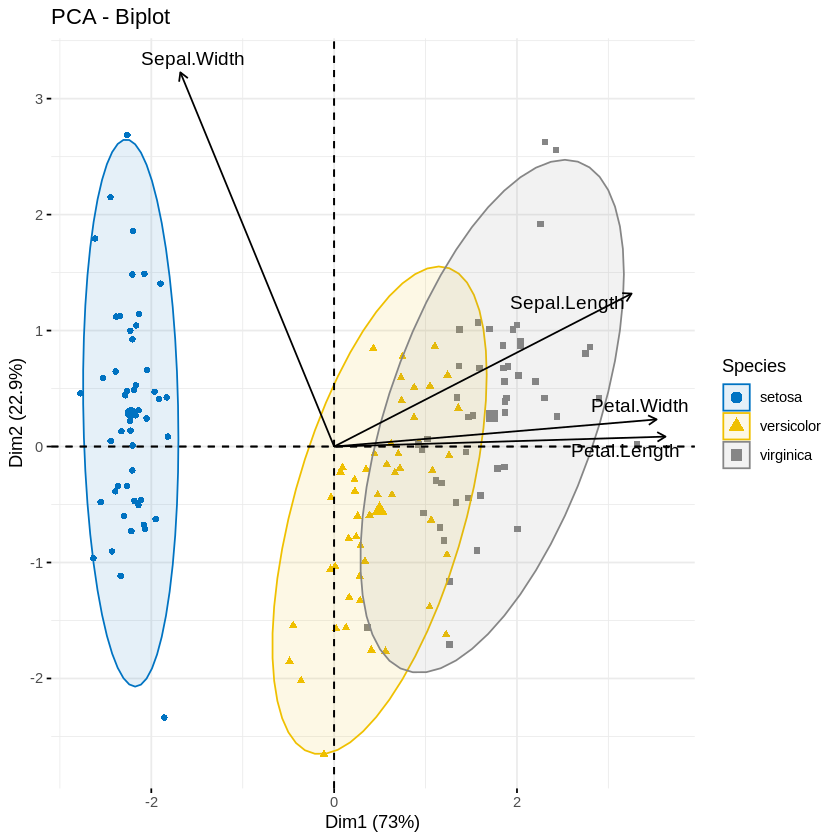

In [55]:
fviz_pca_biplot (iris.pca,
                col.ind = iris$Species, palette = "jco",
                addEllipses = TRUE, label = "var",
                col.var = "black", repel = TRUE,
                legend.title = "Species")

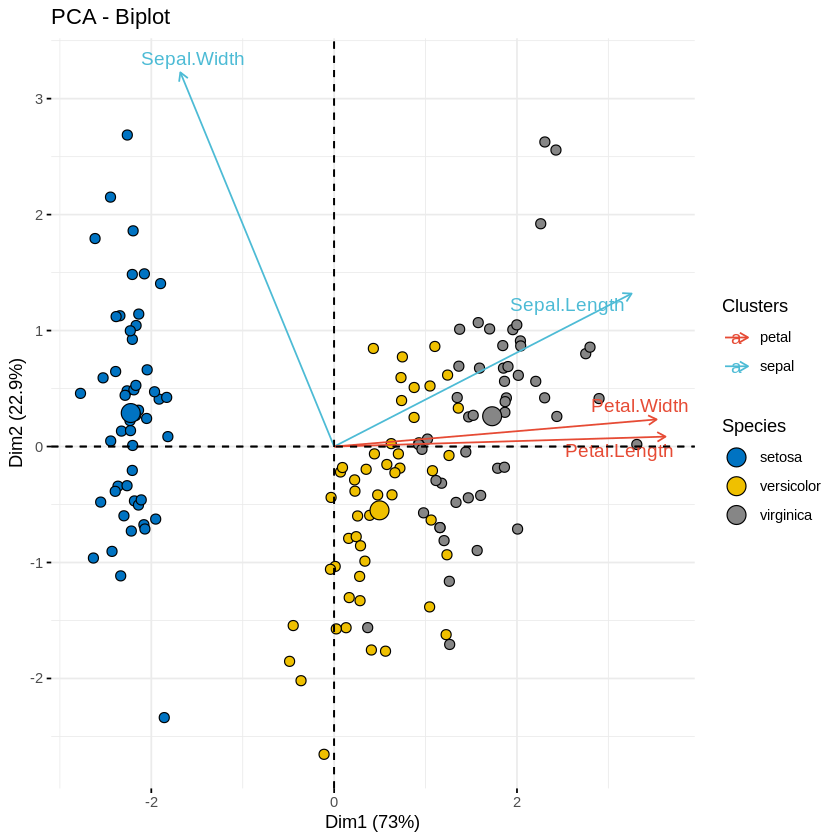

In [56]:
fviz_pca_biplot(iris.pca, 
                # Colueur de remplissage des individdus par groupes
                geom.ind = "point",
                pointshape = 21,
                pointsize = 2.5,
                fill.ind = iris$Species,
                col.ind = "black",
                # Colorer les variables par groupes
                col.var = factor(c("sepal", "sepal", "petal", "petal")),
                
                legend.title = list(fill = "Species", color = "Clusters"),
                repel = TRUE        # Evite le chévauchement du texte
             )+
  ggpubr::fill_palette("jco")+      # Couleur des individus
  ggpubr::color_palette("npg")      # Couleur des variables

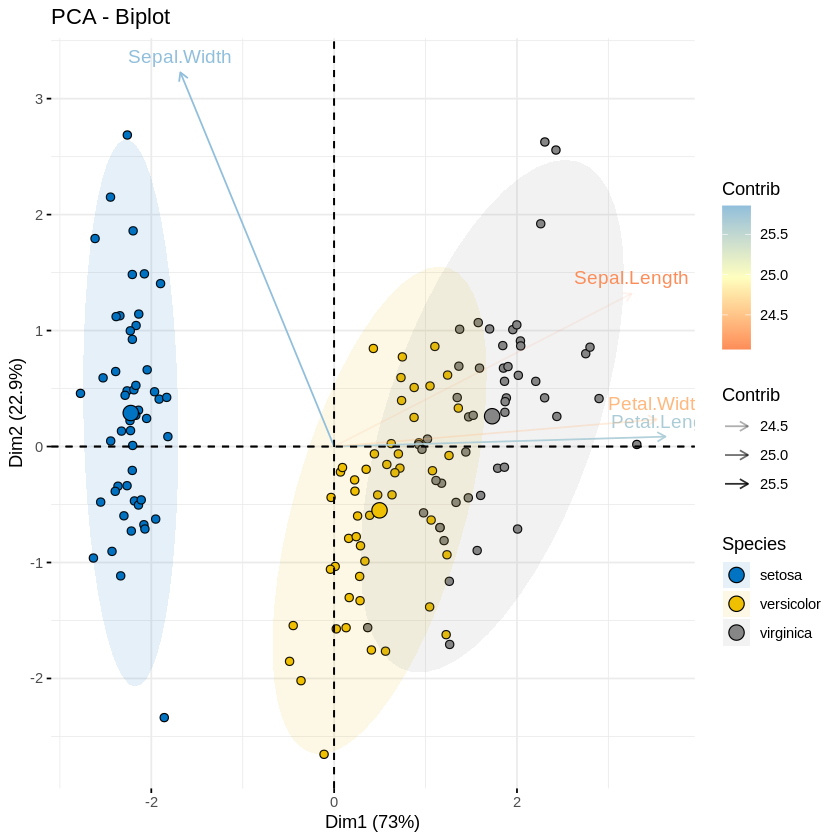

In [57]:
fviz_pca_biplot(iris.pca, 
                # Individus
                geom.ind = "point",
                fill.ind = iris$Species, col.ind = "black",
                pointshape = 21, pointsize = 2,
                palette = "jco",
                addEllipses = TRUE,
                # Variables
                alpha.var ="contrib", col.var = "contrib",
                gradient.cols = "RdYlBu",
                
                legend.title = list(fill = "Species", color = "Contrib",
                                    alpha = "Contrib")
                )

## Eléments supplémentaires


**Spécification dans l’ACP**

In [58]:
res.pca <- PCA(decathlon2, ind.sup = 24:27, 
               quanti.sup = 11:12, quali.sup = 13, graph=FALSE)

**Variables quantitatives**

In [59]:
res.pca$quanti.sup

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Rank,-0.7014777,-0.24519443,-0.1834294,0.05575186,-0.07382647
Points,0.9637075,0.07768262,0.1580225,-0.16623092,-0.03114711
,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Rank,-0.7014777,-0.24519443,-0.1834294,0.05575186,-0.07382647
Points,0.9637075,0.07768262,0.1580225,-0.16623092,-0.03114711
,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Rank,0.4920710,0.060120310,0.03364635,0.00310827,0.0054503477
Points,0.9287322,0.006034589,0.02497110,0.02763272,0.0009701427


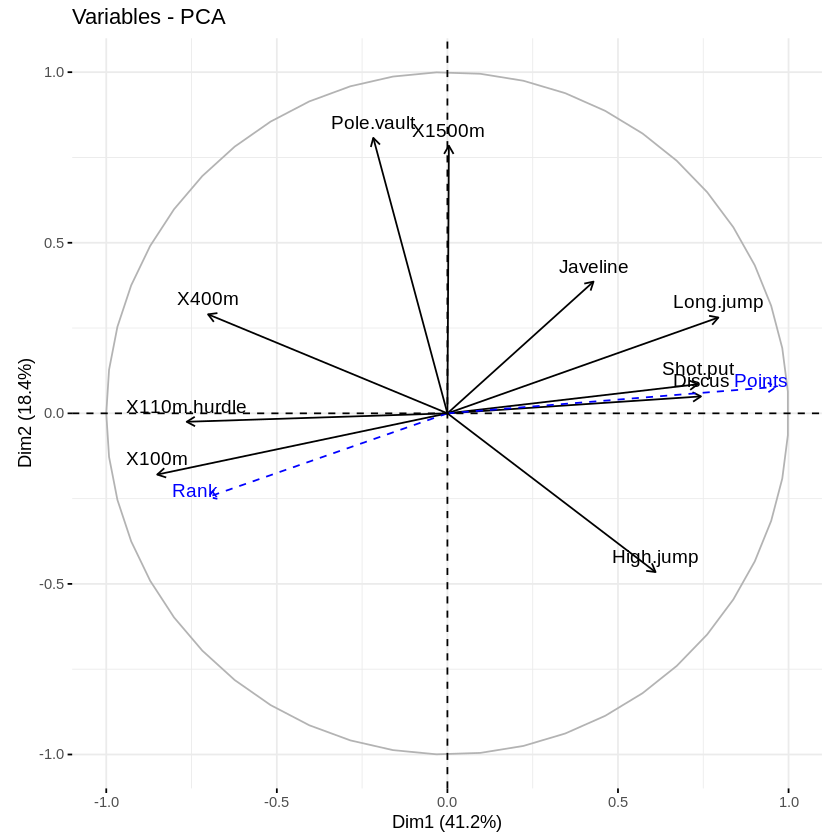

In [60]:
fviz_pca_var(res.pca)

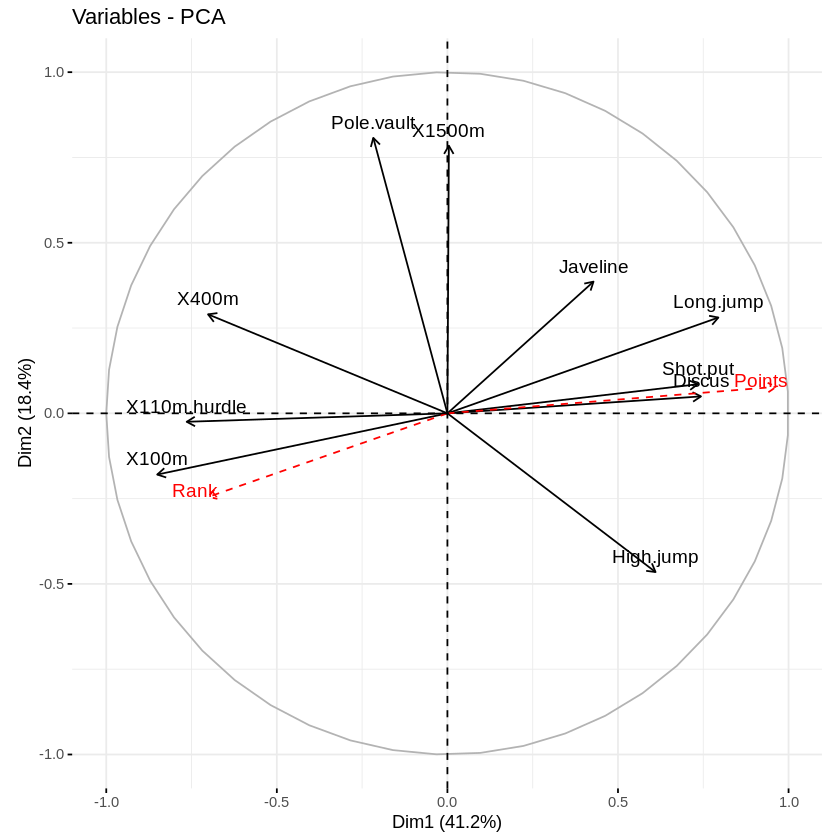

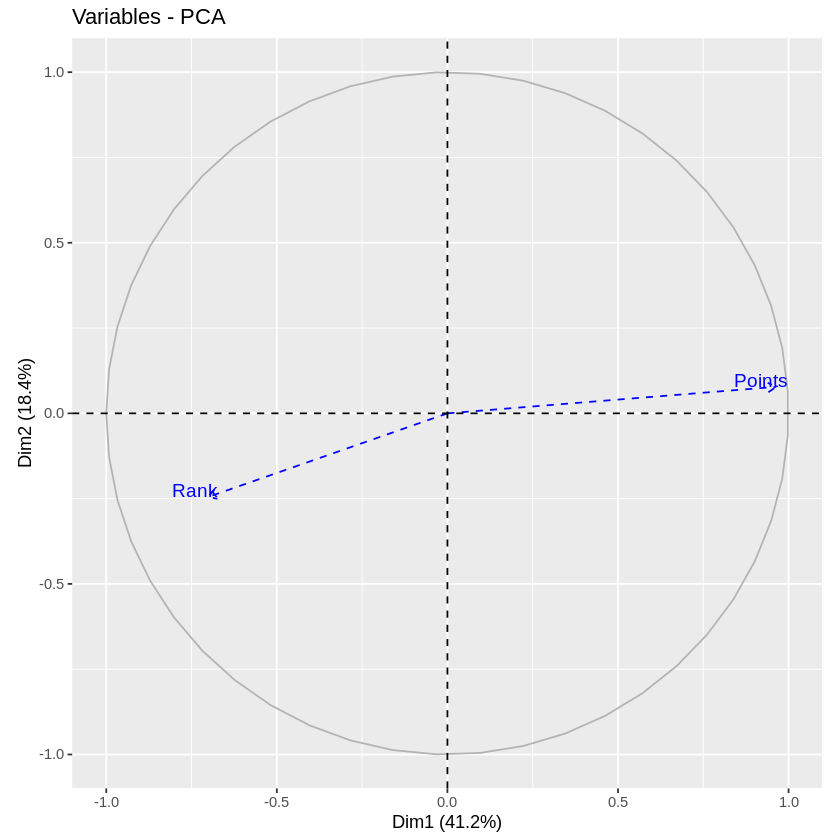

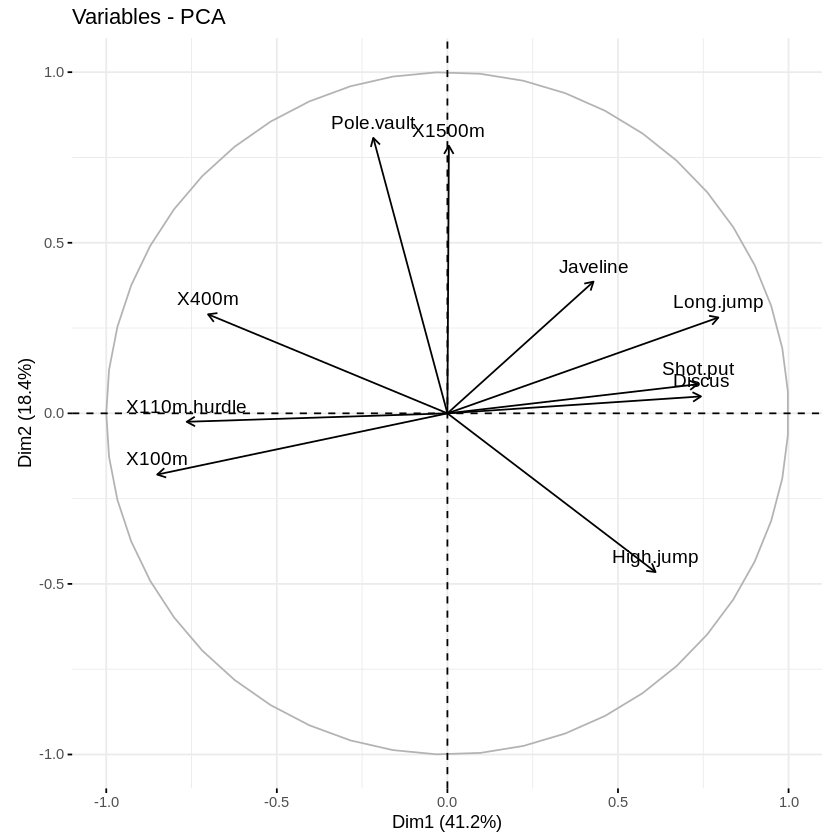

In [61]:
# Changer la couleur des variables
fviz_pca_var(res.pca,
             col.var = "black", # Variables actives
             col.quanti = "red" # variables quantitatives supl.
             )
# Cacher les variables actives sur le graphique,
# ne montrent que des variables supplémentaires
fviz_pca_var(res.pca, invisible = "var")
# Cacher les variables supplémentaires
fviz_pca_var(res.pca, invisible = "quanti.sup")

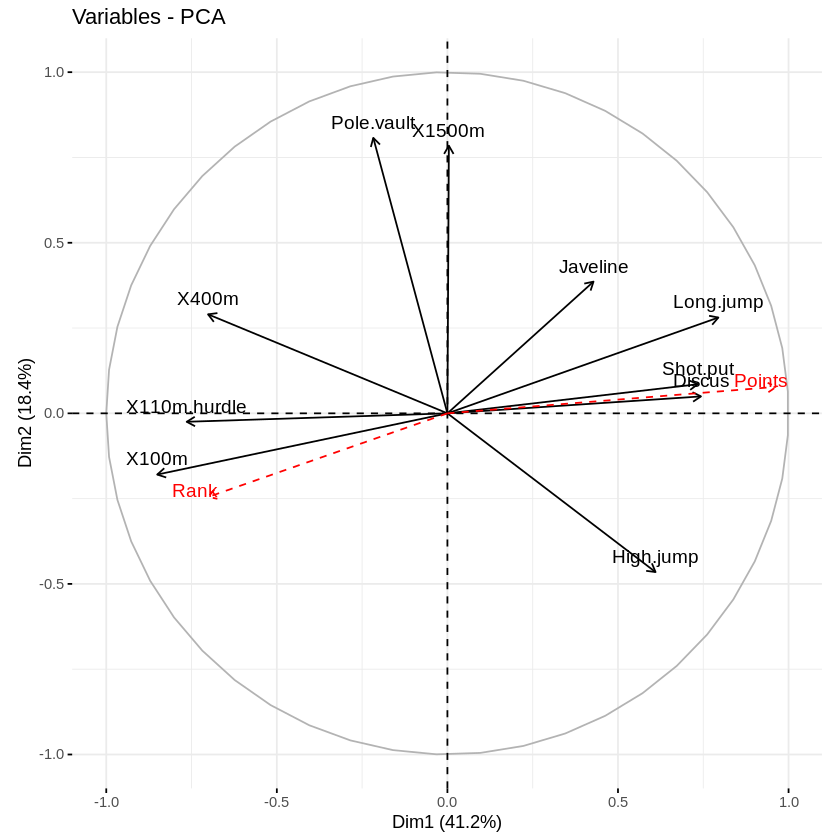

In [62]:
# Graphique des variables actives
p <- fviz_pca_var(res.pca, invisible = "quanti.sup")
# Ajouter des variables actives supplémentaires
fviz_add(p, res.pca$quanti.sup$coord, 
         geom = c("arrow", "text"), 
         color = "red")

In [63]:
res.pca$ind.sup

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
KARPOV,0.7947206,0.77951227,-1.6330203,1.7242283,-0.75070396
WARNERS,-0.3864645,-0.12159237,-1.7387332,-0.7063341,-0.03230011
Nool,-0.5591306,1.97748871,-0.4830358,-2.2784526,-0.25461493
Drews,-1.1092038,0.01741477,-3.0488182,-1.5343468,-0.32642192
,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
KARPOV,0.05104677,4.911173e-02,0.21553730,0.24028620,0.0455487744
WARNERS,0.02422707,2.398250e-03,0.49039677,0.08092862,0.0001692349
Nool,0.02897149,3.623868e-01,0.02162236,0.48108780,0.0060077529
Drews,0.09207094,2.269527e-05,0.69560547,0.17617609,0.0079736753


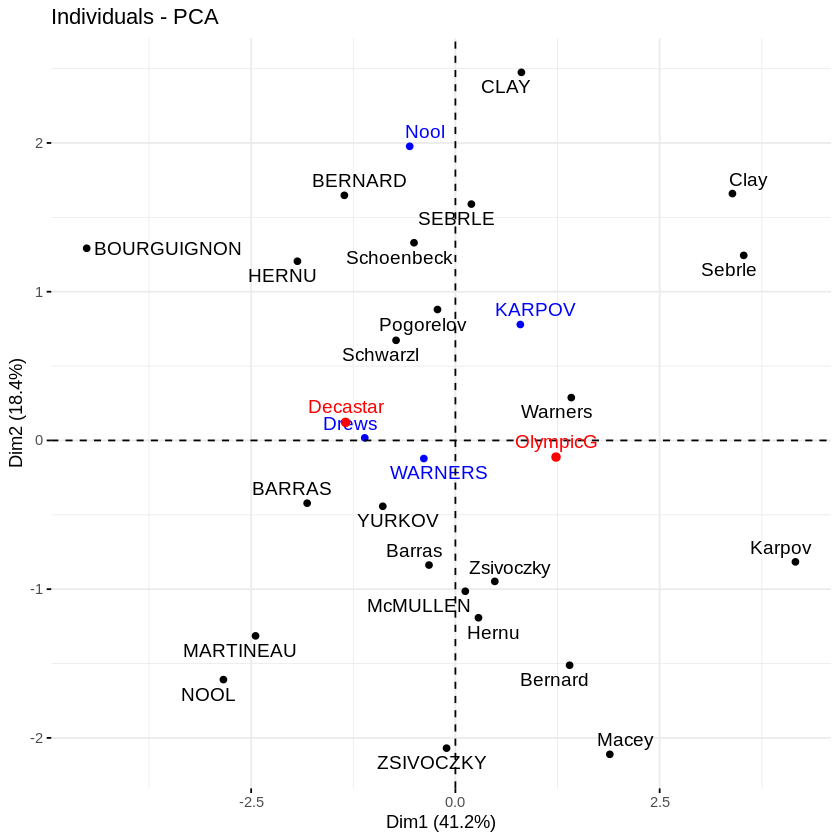

In [64]:
p <- fviz_pca_ind(res.pca, col.ind.sup = "blue", repel = TRUE)
p <- fviz_add(p, res.pca$quali.sup$coord, color = "red")
p

**Variables qualitatives**

In [65]:
res.pca$quali


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Decastar,-1.343451,0.1218097,-0.03789524,0.1808357,0.1343364
OlympicG,1.231497,-0.1116589,0.03473730,-0.1657661,-0.1231417
,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Decastar,0.9051233,0.007440939,0.0007201669,0.01639956,0.009050062
OlympicG,0.9051233,0.007440939,0.0007201669,0.01639956,0.009050062
,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Decastar,-2.970766,0.4034256,-0.1528767,0.8971036,0.7202457
OlympicG,2.970766,-0.4034256,0.1528767,-0.8971036,-0.7202457
,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Competition,0.4011568,0.00739783,0.001062332,0.03658159,0.02357972


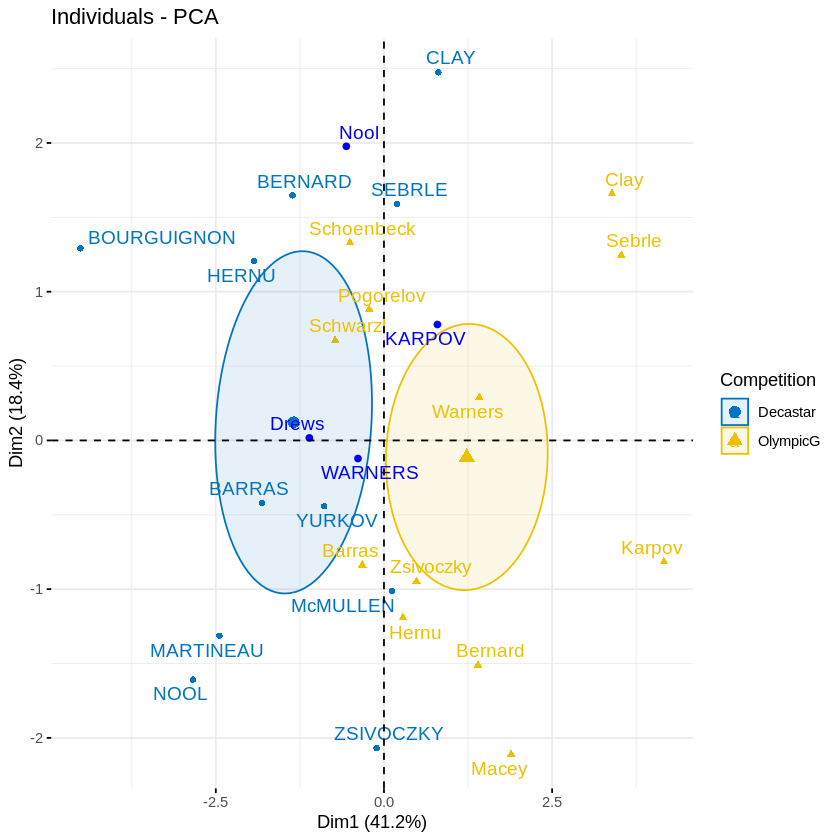

In [66]:
fviz_pca_ind(res.pca, habillage = 13,
             addEllipses =TRUE, ellipse.type = "confidence",
             palette = "jco", repel = TRUE) 

## Filtrer les résultats


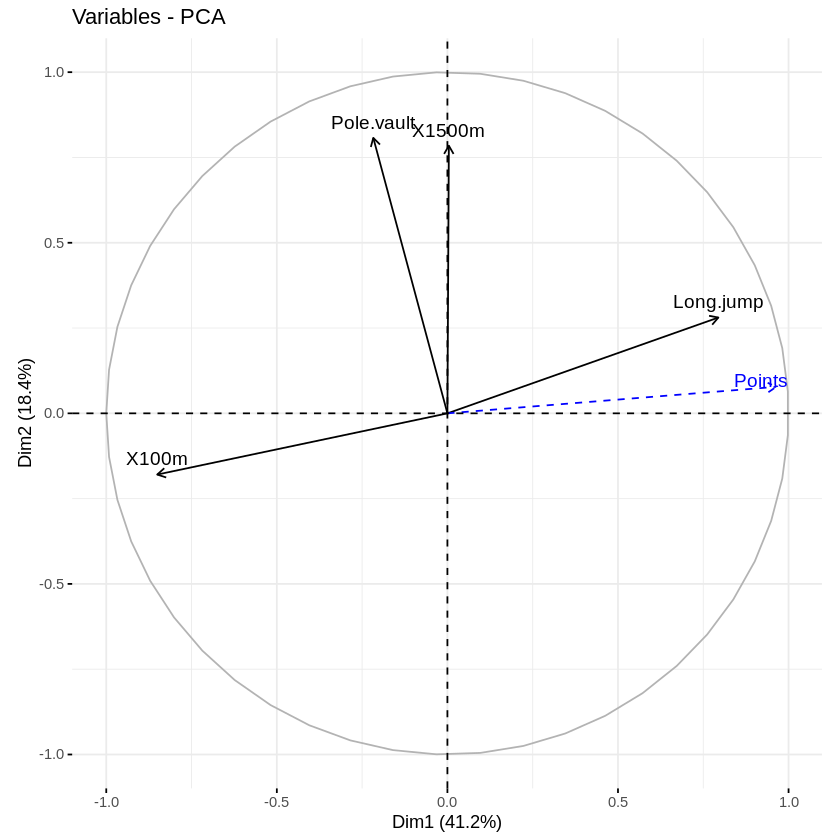

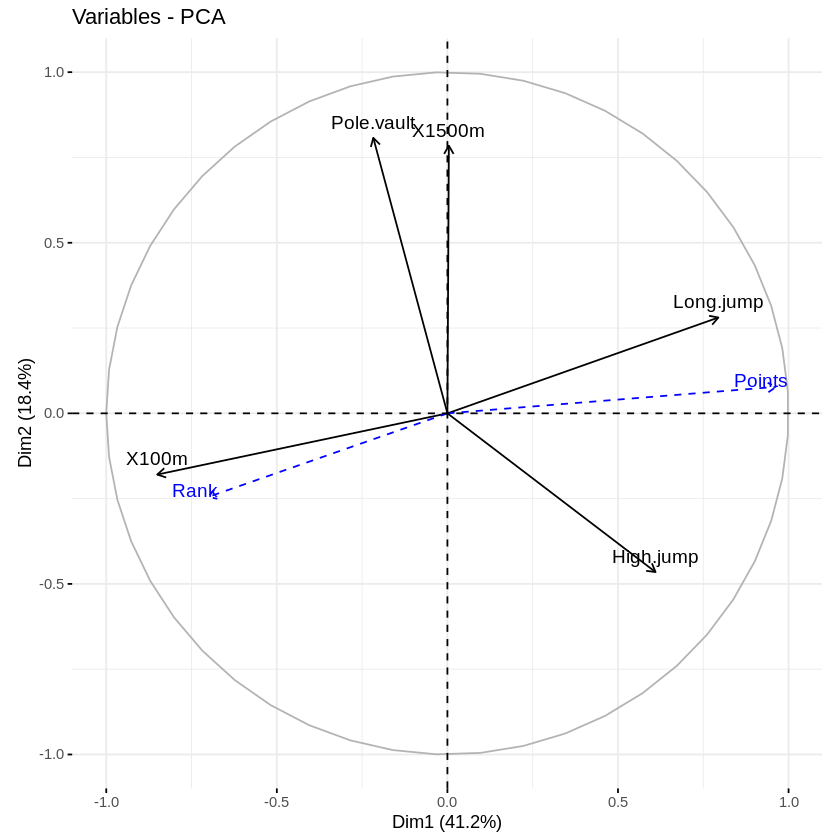

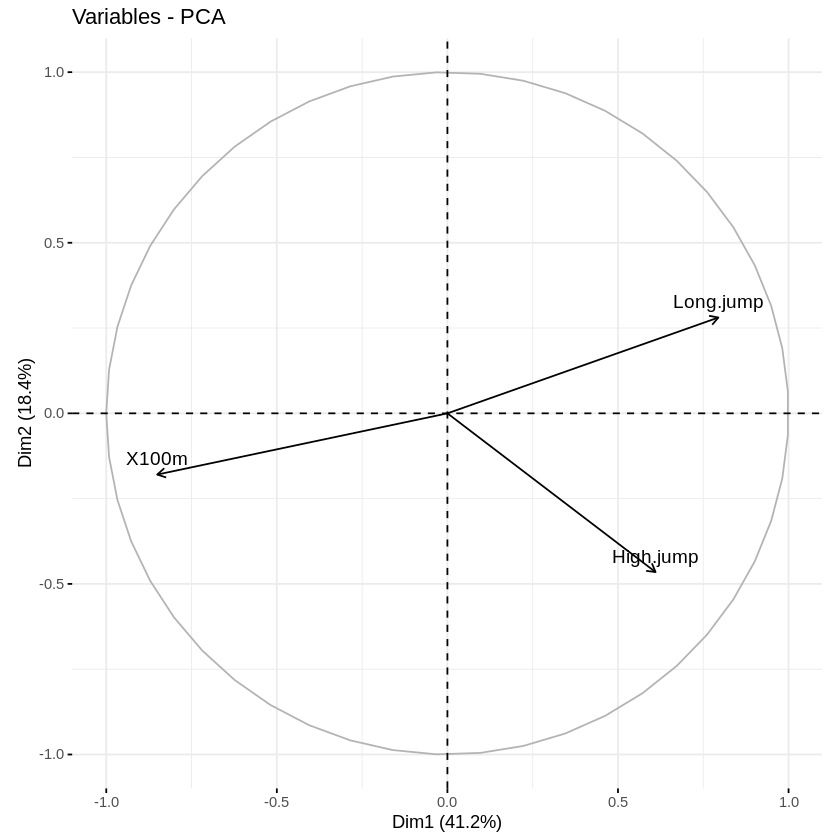

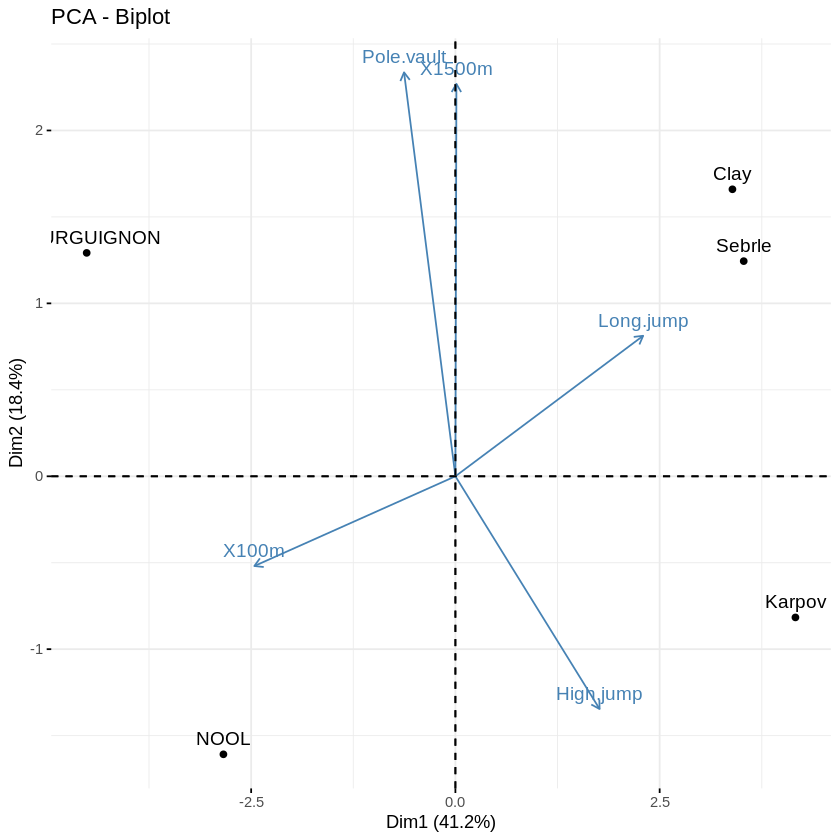

In [67]:
# Visualiser les variables avec cos2> = 0.6
fviz_pca_var (res.pca, select.var = list(cos2 = 0.6))
# Top 5 variables actives avec le cos2 le plus elevé
fviz_pca_var (res.pca, select.var = list(cos2 = 5))
# Sélectionnez par noms
name <- list (name = c ("Long.jump", "High.jump", "X100m"))
fviz_pca_var (res.pca, select.var = name)
# Top 5 des individus/variables les plus contibutifs
fviz_pca_biplot (res.pca, select.ind = list (contrib = 5),
               select.var = list (contrib = 5),
               ggtheme = theme_minimal())

## Exportation des résultats

**Exporter les graphiques en PDF / PNG**

In [72]:
# Scree plot
scree.plot <- fviz_eig (res.pca)
# Graphique des d'individus
ind.plot <- fviz_pca_ind (res.pca)
# Graphique des variables
var.plot <- fviz_pca_var (res.pca)

In [73]:
pdf ("PCA.pdf") # Créer un nouveau périphérique pdf
print (scree.plot)
print (ind.plot)
print (var.plot)
dev.off () # Ferme le périphérique pdf

png 
  2

png 
  2

In [74]:
# Enregistrer sur un fichier png
png ("pca-scree-plot.png")
print(scree.plot)
dev.off ()
# Enregistrer les individus dans un fichier png
png ("pca-variables.png")
print(var.plot)
dev.off ()
# Enregistrer les variables dans un fichier png
png ("pca-individuals.png")
print(ind.plot)
dev.off ()

png 
  2

png 
  2

png 
  2

In [75]:
library (ggpubr)
ggexport (plotlist = list(scree.plot, ind.plot, var.plot),
         filename = "PCA.pdf")

file saved to PCA.pdf



In [76]:
ggexport (plotlist = list(scree.plot, ind.plot, var.plot),
         nrow = 2, ncol = 2,
         filename = "PCA.pdf")

file saved to PCA.pdf



In [77]:
ggexport (plotlist = list(scree.plot, ind.plot, var.plot),
         filename = "PCA.png")

[1] "PCA%03d.png"


file saved to PCA%03d.png



In [78]:
# Exporter vers un fichier TXT
write.infile (res.pca, "pca.txt", sep = "\t")
# Exporter vers un fichier CSV
write.infile (res.pca, "pca.csv", sep = ";")

## Résumé


In [79]:
res.pca <- prcomp (iris [, -5], scale. = TRUE)


In [80]:
res.pca <- princomp (iris [, -5], cor = TRUE)



In [83]:
install.packages("ade4")
library ("ade4")
res.pca <- dudi.pca (iris [, -5], scannf = FALSE, nf = 5)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘pixmap’, ‘sp’



Attaching package: ‘ade4’


The following object is masked from ‘package:FactoMineR’:

    reconst




In [85]:
install.packages("ExPosition")
library ("ExPosition")
res.pca <- epPCA (iris [, -5], graph = FALSE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘prettyGraphs’


Loading required package: prettyGraphs



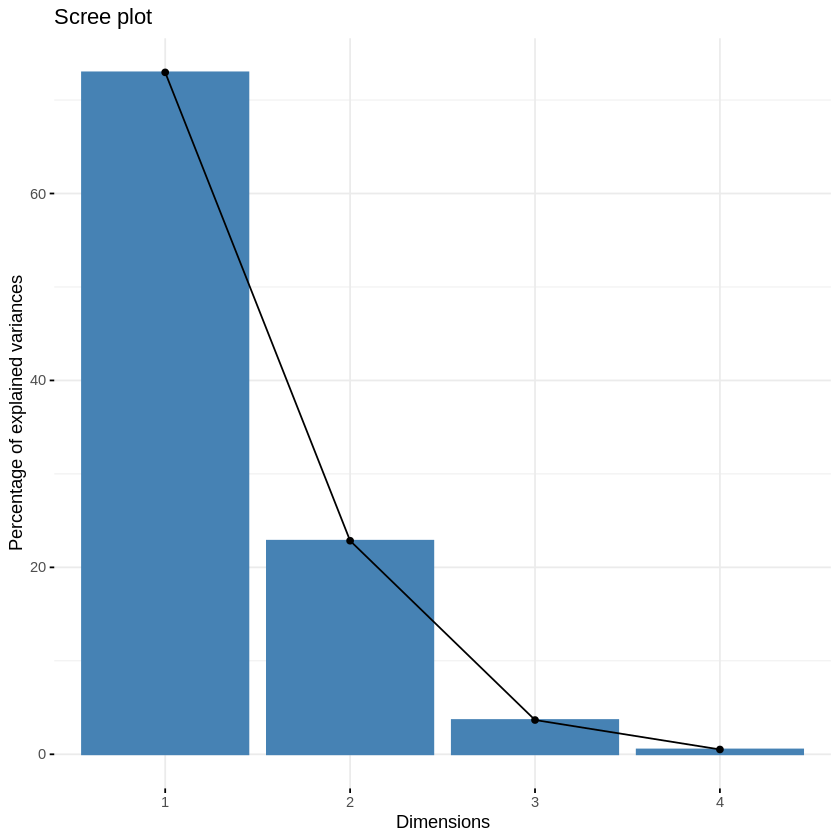

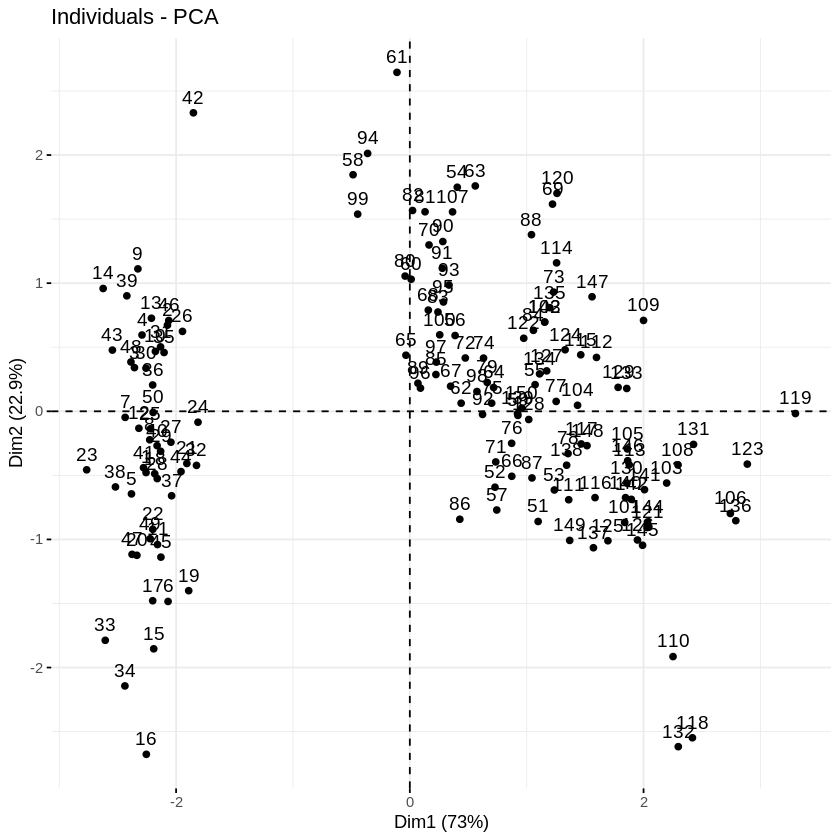

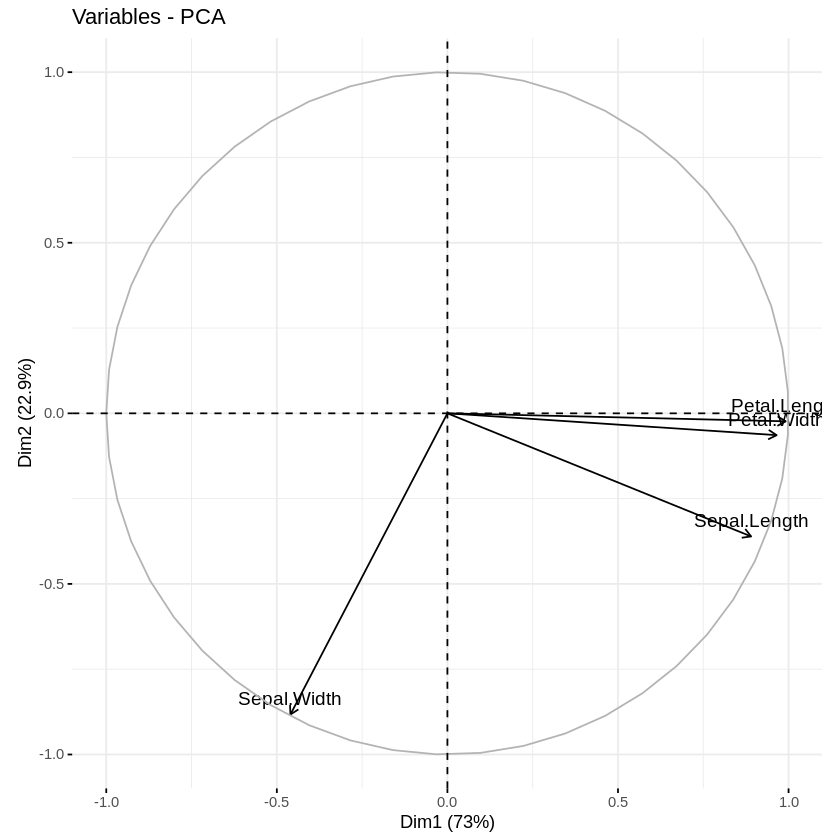

In [86]:
fviz_eig (res.pca) # Scree plot
fviz_pca_ind (res.pca) # Graphique des individus
fviz_pca_var (res.pca) # Graphique des variables